# Stock vs Index hurst index estimation - Log S-fbm model

### Done by : Othmane ZARHALI

# Importations

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes"))

import matplotlib.pyplot as plt
from math import log
import warnings
warnings.filterwarnings("ignore")

from DataAcquisition import *
from GMMCalibration import *
from LogSfbmModel import *

# Oxford Man institute realized volatility acquisition

In [2]:
File_path = "/Users/othmane/Desktop/MyPhD/Numerics/Indices vs stocks hurst index GMM estimates/Indices vs stocks hurst index GMM estimates - Codes/oxfordmanrealizedvolatilityindices.csv"
realized_vol_data_obj_ox = DataAcquisition('OxfordManInstitute',File_path)

In [3]:
realized_vol_data_obj_ox.IndicesCharging()
indices_list = realized_vol_data_obj_ox.indices_list
vol_dataset = realized_vol_data_obj_ox.dataframe_indices
print(vol_dataset)

         index                 Unnamed: 0 Symbol  close_time  rk_parzen  \
0            0  2000-01-03 00:00:00+00:00   .AEX    163015.0   0.000179   
1            1  2000-01-04 00:00:00+00:00   .AEX    163016.0   0.000423   
2            2  2000-01-05 00:00:00+00:00   .AEX    163016.0   0.000324   
3            3  2000-01-06 00:00:00+00:00   .AEX    163002.0   0.000219   
4            4  2000-01-07 00:00:00+00:00   .AEX    163016.0   0.000155   
...        ...                        ...    ...         ...        ...   
139940  145271  2021-04-05 00:00:00+01:00   .STI    180000.0   0.000004   
139941  145272  2021-04-06 00:00:00+01:00   .STI    180000.0   0.000024   
139942  145273  2021-04-07 00:00:00+01:00   .STI    180000.0   0.000013   
139943  145274  2021-04-08 00:00:00+01:00   .STI    175959.0   0.000009   
139944  145275  2021-04-09 00:00:00+01:00   .STI    180000.0   0.000006   

        open_time  open_price     medrv       rv5        bv  ...    rk_th2  \
0         90101.0    

Indices available

In [4]:
indices_list

['.AEX',
 '.AORD',
 '.BFX',
 '.BSESN',
 '.BVLG',
 '.BVSP',
 '.DJI',
 '.FCHI',
 '.FTMIB',
 '.FTSE',
 '.GDAXI',
 '.GSPTSE',
 '.HSI',
 '.IBEX',
 '.IXIC',
 '.KS11',
 '.KSE',
 '.MXX',
 '.N225',
 '.NSEI',
 '.OMXC20',
 '.OMXHPI',
 '.OMXSPI',
 '.OSEAX',
 '.RUT',
 '.SMSI',
 '.SSEC',
 '.SSMI',
 '.STI']

##### Log vol computation

##### Let's consider two indices : NSEI and STI

In [5]:
log_vols_NSEI = realized_vol_data_obj_ox.GetlogVol(".NSEI",'bv',True,True,False,0,0)
log_vols_STI = realized_vol_data_obj_ox.GetlogVol(".STI",'bv',True,True,False,0,0)
print(log_vols_NSEI,log_vols_STI)

[ -9.09583846  -8.42565538  -8.41514315 ...  -9.20799311 -10.37571292
 -11.10107484] [-10.85806965 -10.23129018  -9.93152778 ...  -9.97600644  -9.8917955
  -9.86773188]


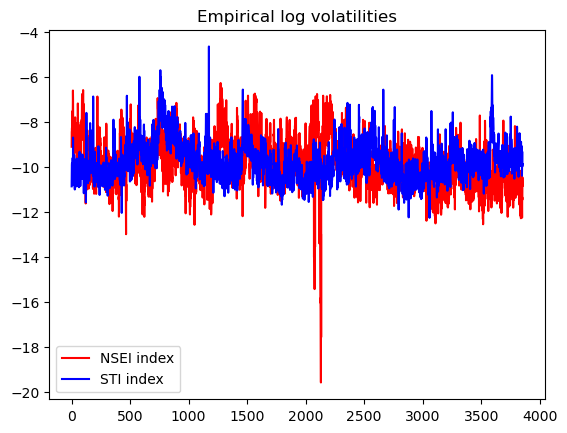

In [6]:
min_length = min(len(log_vols_NSEI),len(log_vols_STI))
time_line = np.arange(min_length)
plt.plot(time_line,log_vols_NSEI[:min_length], color='red',label='NSEI index')
plt.plot(time_line,log_vols_STI[:min_length], color='blue',label='STI index')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

##### Log vol statistics

##### Numerical tests -  NSEI

In [7]:
# NSEI
logvolvariance_overall_with_lag_NSEI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_NSEI)
print(logvolvariance_overall_with_lag_NSEI)

(array([   8,    9,   12,   14,   18,   22,   28,   34,   42,   52,   64,
         79,   98,  120,  148,  183,  226,  278,  343,  422,  521,  642,
        791,  975, 1201, 1480, 1824, 2248, 2770, 3413, 4206, 5183]), array([0.35842535, 0.37524941, 0.41599062, 0.4381994 , 0.47550027,
       0.50773756, 0.54964531, 0.58411015, 0.62014323, 0.65322222,
       0.6802255 , 0.7074864 , 0.73739737, 0.76633661, 0.79322425,
       0.81666472, 0.83875362, 0.86066882, 0.87920371, 0.89422324,
       0.9089994 , 0.92457659, 0.93926288, 0.95923213, 0.98452674,
       1.01168093, 1.04670444, 1.09140392, 1.13095154, 1.16028133,
       1.13001706,        nan]))


In [8]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek('.NSEI')
print(means_and_variance_eachday_in_week)

(array([-9.05457534, -8.70085103, -9.18843551, -9.21880093, -9.81530079]), array([0.78077038, 1.53100143, 0.56212798, 0.51751696, 0.01510113]))


In [9]:
correl = Correlation(log_vols_NSEI,log_vols_NSEI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([1.08385978, 0.78083193, 0.701292  , 0.65365305, 0.61472904,
       0.61077713, 0.55307408, 0.52553815, 0.49779351, 0.49031727,
       0.49593499, 0.45630645, 0.43516446, 0.43246381, 0.41850497,
       0.409631  , 0.37083193, 0.34827862, 0.34972304, 0.33220779,
       0.31701237, 0.28914225, 0.28188284, 0.28132966, 0.28327881,
       0.27685011, 0.26077149, 0.25676326, 0.25973784, 0.2636926 ,
       0.25447167, 0.24994179, 0.2480732 , 0.25472634, 0.25905081,
       0.25614122, 0.24835241, 0.25703416, 0.24836318, 0.25128471,
       0.24110904, 0.23756706, 0.24073382, 0.25230844, 0.26547803,
       0.26772659, 0.26084441, 0.26888187, 0.28068201, 0.26864436,
       0.28446571]))


##### Numerical tests -  STI

In [10]:
# STI
logvolvariance_overall_with_lag_STI = realized_vol_data_obj_ox.GetlogVolVar_vs_Size(log_vols_STI)
print(logvolvariance_overall_with_lag_STI)

(array([   8,    9,   11,   14,   17,   21,   26,   32,   39,   48,   58,
         71,   87,  106,  130,  158,  193,  236,  288,  352,  430,  525,
        641,  782,  955, 1165, 1422, 1736, 2119, 2587, 3157, 3854]), array([0.18273815, 0.18972343, 0.20144343, 0.21593706, 0.22769403,
       0.24095312, 0.25510806, 0.26978724, 0.28439693, 0.30015858,
       0.31527965, 0.33189439, 0.34916642, 0.36677116, 0.38499093,
       0.40253773, 0.42001739, 0.43867449, 0.45920557, 0.48098552,
       0.5068847 , 0.53854361, 0.57256764, 0.60256036, 0.60940972,
       0.61395769, 0.62028397, 0.62769465, 0.63290987, 0.6567422 ,
       0.69929094,        nan]))


In [11]:
means_and_variance_eachday_in_week = realized_vol_data_obj_ox.ComputeMeanVarianceinWeek(".STI")
print(means_and_variance_eachday_in_week)

(array([-10.85806965, -10.23129018,  -9.93152778,  -9.82895074,
       -10.09268284]), array([1.15224036, 0.19949187, 0.02157454, 0.00196299, 0.09488728]))


In [12]:
correl = Correlation(log_vols_STI,log_vols_STI)
print(correl)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([0.65945294, 0.49742405, 0.45827235, 0.44268707, 0.42729325,
       0.42060089, 0.40239439, 0.39835343, 0.39364837, 0.38300065,
       0.38237012, 0.36583987, 0.35021808, 0.35613399, 0.35539619,
       0.34918668, 0.3409036 , 0.33442755, 0.32939468, 0.32731938,
       0.32173866, 0.31295264, 0.31003246, 0.30617113, 0.30392936,
       0.30272755, 0.29056251, 0.2869957 , 0.28180388, 0.27833755,
       0.27958174, 0.27724508, 0.27578545, 0.26964285, 0.27446028,
       0.28156098, 0.2679243 , 0.26988708, 0.26415253, 0.26117487,
       0.26394733, 0.2579122 , 0.25592286, 0.24922336, 0.24350831,
       0.25146695, 0.24683316, 0.23884517, 0.23807632, 0.2312326 ,
       0.23689783]))


# Yahoo finance data acquisition

##### Log vol computation

##### Let's consider two stocks : GOOGL and AMZN

##### GOOGL

In [13]:
realized_vol_data_obj_yf_GOOGL = DataAcquisition('Yahoo finance')

In [14]:
realized_vol_data_obj_yf_GOOGL.IndicesCharging("GOOGL",first_date="1900-01-01",last_date="2034-01-01")
market_data_GOOGL = realized_vol_data_obj_yf_GOOGL.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [15]:
market_data_GOOGL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2022-11-07,87.279999,88.900002,86.849998,88.489998,88.489998,34078900
2022-11-08,88.900002,90.320000,87.589996,88.900002,88.900002,30429000
2022-11-09,88.449997,89.440002,87.279999,87.320000,87.320000,31769100


In [16]:
market_capitalization_GOOGL = realized_vol_data_obj_yf_GOOGL.market_capitalization

In [17]:
signal_test_GOOGL = market_data_GOOGL["Close"]

In [18]:
removed0signal_test_GOOGL = realized_vol_data_obj_yf_GOOGL.removeZeros(np.array(signal_test_GOOGL))
log_vol_estimator_GOOGL = realized_vol_data_obj_yf_GOOGL.ComputeLogVolEstimator()

##### AMZN

In [19]:
realized_vol_data_obj_yf_AMZN = DataAcquisition('Yahoo finance')

In [20]:
realized_vol_data_obj_yf_AMZN.IndicesCharging("AMZN",first_date="1900-01-01",last_date="2034-01-01")
market_data_AMZN = realized_vol_data_obj_yf_AMZN.dataframe_indices

[*********************100%***********************]  1 of 1 completed


In [21]:
market_data_AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-11-07,91.949997,92.099998,89.040001,90.529999,90.529999,77495700
2022-11-08,90.790001,91.720001,88.230003,89.980003,89.980003,88703400
2022-11-09,89.470001,89.480003,85.870003,86.139999,86.139999,90796200


In [22]:
market_capitalization_AMZN = realized_vol_data_obj_yf_AMZN.market_capitalization

In [23]:
signal_test_AMZN = market_data_AMZN["Close"]

In [24]:
removed0signal_test_AMZN = realized_vol_data_obj_yf_AMZN.removeZeros(np.array(signal_test_AMZN))
log_vol_estimator_AMZN = realized_vol_data_obj_yf_AMZN.ComputeLogVolEstimator()

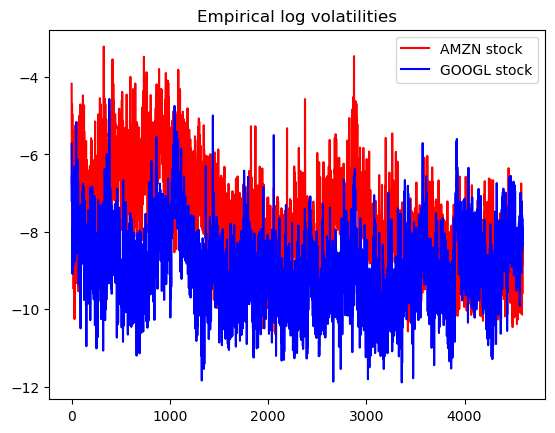

In [25]:
min_length = min(len(log_vol_estimator_AMZN),len(log_vol_estimator_GOOGL))
time_line = np.arange(min_length)
plt.plot(time_line,log_vol_estimator_AMZN[:min_length], color='red',label='AMZN stock')
plt.plot(time_line,log_vol_estimator_GOOGL[:min_length], color='blue',label='GOOGL stock')

plt.title("Empirical log volatilities")
plt.legend()
plt.show()

# GMM Calibration

In [26]:
GMM_obj = GMM()

### GMM on indices

##### NSEI

*******************************
res =        fun: 0.014382097864422329
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.56943514e-05, -5.20417046e-10,  8.67361738e-10])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 4556
      nit: 416
     njev: 1139
   status: 0
  success: True
        x: array([-5.1770887 , -1.84065629,  0.06167522])
*******************************
Objective function value after calibration =  0.005105415981393452


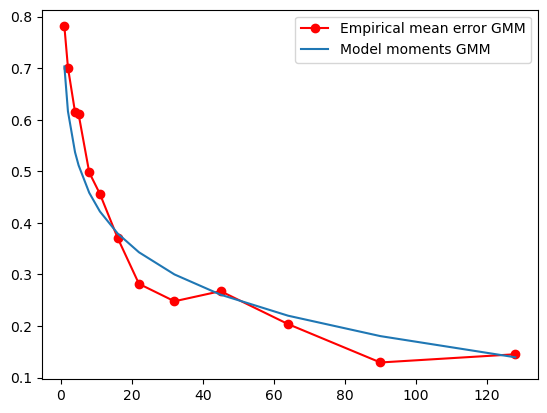

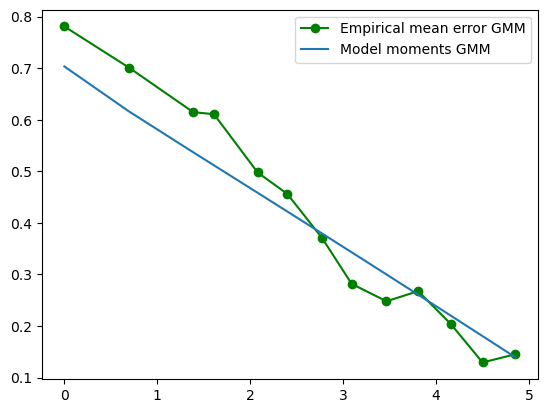

H =  0.005582377919682376 lambda2 = 0.10935691633908327 T =  1.0697488753025635 lsigma2 = 4.5399929762484854e-05 p-Value=  0.003166796958927884 J =  26.46137103156232 J_95 =  18.30703805327515
------------------------------------------------------


(0.005582377919682376,
 0.10935691633908327,
 1.0697488753025635,
 4.5399929762484854e-05,
 0.003166796958927884,
 26.46137103156232,
 18.30703805327515,
 [array([0.78083193, 0.701292  , 0.61472904, 0.61077713, 0.49779351,
         0.45630645, 0.37083193, 0.28188284, 0.2480732 , 0.26772659,
         0.203828  , 0.12942438, 0.14536152]),
  array([0.70328145, 0.61635971, 0.53697281, 0.51166717, 0.45837923,
         0.42220084, 0.37950863, 0.34310116, 0.30010809, 0.26083772,
         0.22011149, 0.18053947, 0.13949864]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [27]:
calibrated_parameters_NSEI = GMM_obj.ComputeParamsGMM(log_vols_NSEI)
calibrated_parameters_NSEI

##### STI

*******************************
res =        fun: 0.000385662821968008
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.49464860e-06, -3.66276022e-07, -6.38367401e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 464
      nit: 41
     njev: 116
   status: 2
  success: False
        x: array([-2.28268463, -3.30107914,  1.13269762])
*******************************
Objective function value after calibration =  0.0011198642548073128


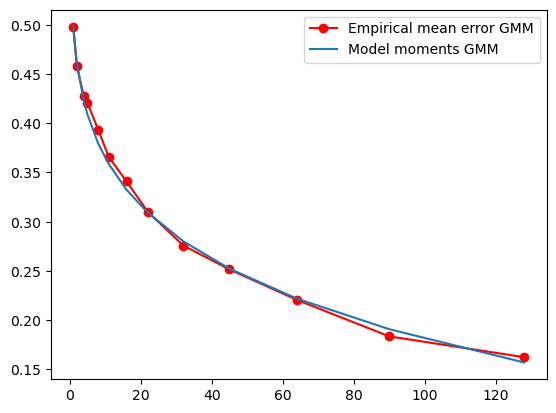

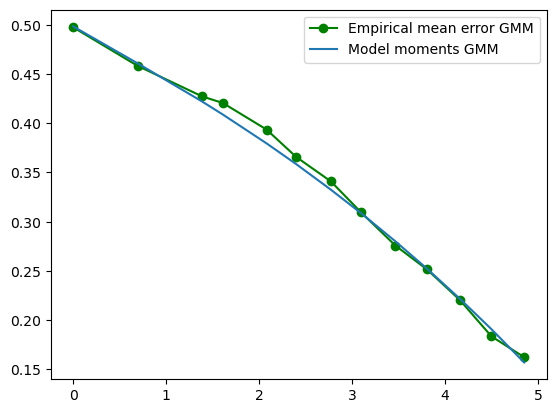

H =  0.076972167347693 lambda2 = 0.03952835398816385 T =  2.6278243571722353 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9319700526550283 J =  4.315956838027383 J_95 =  18.30703805327515
------------------------------------------------------


(0.076972167347693,
 0.03952835398816385,
 2.6278243571722353,
 4.5399929762484854e-05,
 0.9319700526550283,
 4.315956838027383,
 18.30703805327515,
 [array([0.49742405, 0.45827235, 0.42729325, 0.42060089, 0.39364837,
         0.36583987, 0.3409036 , 0.31003246, 0.27578545, 0.25146695,
         0.22053445, 0.18351524, 0.16235613]),
  array([0.49831654, 0.46081518, 0.42208908, 0.40887157, 0.37959705,
         0.35856292, 0.33247639, 0.3091001 , 0.2800925 , 0.25220777,
         0.22182169, 0.19079908, 0.15699248]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [28]:
calibrated_parameters_STI = GMM_obj.ComputeParamsGMM(log_vols_STI)
calibrated_parameters_STI

### GMM on stocks

##### GOOGL

*******************************
res =        fun: 0.0006672402091744813
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.76748158e-07, 9.97466005e-09, 2.33537149e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 308
      nit: 31
     njev: 77
   status: 2
  success: False
        x: array([-2.19817769, -3.00851511,  1.14375338])
*******************************
Objective function value after calibration =  0.001277697515374729


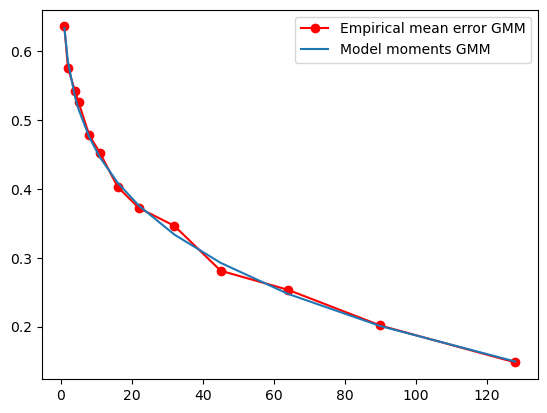

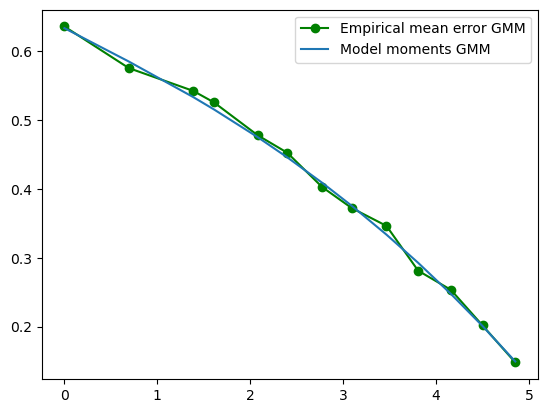

H =  0.09520838005834581 lambda2 = 0.04863104496783518 T =  2.991750770379514 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8262954036017447 J =  5.867186990600755 J_95 =  18.30703805327515
------------------------------------------------------


(0.09520838005834581,
 0.04863104496783518,
 2.991750770379514,
 4.5399929762484854e-05,
 0.8262954036017447,
 5.867186990600755,
 18.30703805327515,
 [array([0.63594438, 0.57549043, 0.54233178, 0.52564624, 0.47791163,
         0.45250115, 0.40274695, 0.37217371, 0.34616514, 0.28111456,
         0.25325   , 0.20146493, 0.14772474]),
  array([0.63354013, 0.58502152, 0.53335574, 0.51541466, 0.47516107,
         0.44581777, 0.40896081, 0.37551282, 0.33347794, 0.29253969,
         0.24736137, 0.20065003, 0.14909902]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [29]:
calibrated_parameters_GOOGL = GMM_obj.ComputeParamsGMM(log_vol_estimator_GOOGL)
calibrated_parameters_GOOGL

##### AMZN

*******************************
res =        fun: 0.0013306946210442114
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.62745773e-05, 6.02562708e-06, 5.75446158e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1532
      nit: 141
     njev: 383
   status: 0
  success: True
        x: array([-5.51873486, -2.41319503,  0.12294094])
*******************************
Objective function value after calibration =  0.000838802069129118


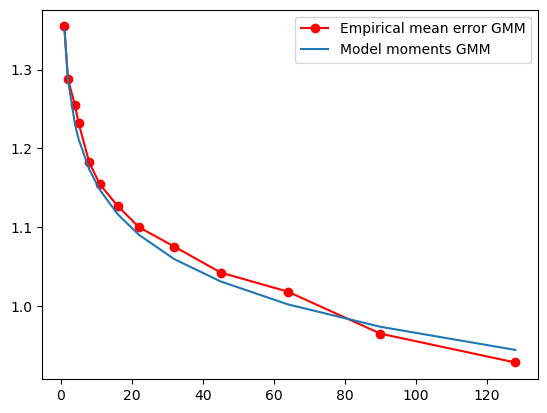

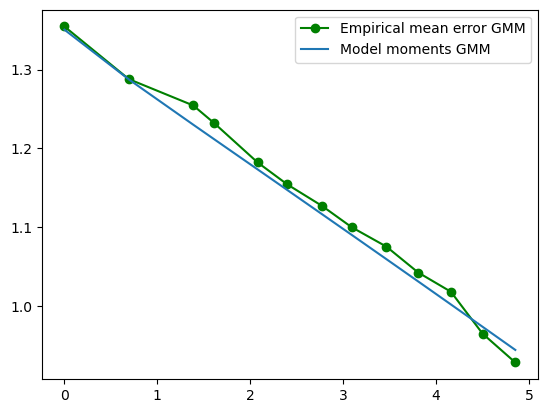

H =  0.003992941787973938 lambda2 = 0.07973095086043855 T =  1.133300090573029 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8641382127247128 J =  5.38343167754564 J_95 =  18.30703805327515
------------------------------------------------------


(0.003992941787973938,
 0.07973095086043855,
 1.133300090573029,
 4.5399929762484854e-05,
 0.8641382127247128,
 5.38343167754564,
 18.30703805327515,
 [array([1.35465604, 1.28781456, 1.2543662 , 1.23217272, 1.18197942,
         1.15413868, 1.12680059, 1.09978568, 1.07506843, 1.04225543,
         1.01783254, 0.96463075, 0.92800637]),
  array([1.35062217, 1.28747692, 1.22996578, 1.21166145, 1.17315989,
         1.14705335, 1.11628047, 1.09006663, 1.0591452 , 1.03093333,
         1.0017078 , 0.97334181, 0.94395534]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [30]:
calibrated_parameters_AMZN = GMM_obj.ComputeParamsGMM(log_vol_estimator_AMZN)
calibrated_parameters_AMZN

### Multiple Stock and indices calibration

### Indices

In [31]:
Indices_test_symbols = ['.AEX','.AORD','.BFX', '.BSESN']

In [32]:
logvol_synthesis_ox = realized_vol_data_obj_ox.LogVolSynthesisOverAssets(Indices_test_symbols)
logvol_synthesis_ox

{'.AEX': array([ -9.363648  ,  -9.2829408 ,  -9.50419861, ..., -10.49494979,
        -10.66919384, -10.78024093]),
 '.AORD': array([ -9.810457  , -10.30105542,  -9.36433307, ...,  -9.88412876,
        -10.28379873, -11.13394767]),
 '.BFX': array([ -9.71483899, -10.46947439, -10.05192215, ..., -10.47888137,
        -10.44993989, -11.10387582]),
 '.BSESN': array([ -8.93322485,  -8.79850441,  -8.76741764, ..., -10.37471496,
        -10.16140705, -10.44435716])}

In [33]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_ox)

*******************************
res =        fun: 0.0016549759696170706
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.87337126e-06, -2.40259203e-08, -1.41813645e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 328
      nit: 30
     njev: 82
   status: 2
  success: False
        x: array([-1.89693078, -3.12313319,  1.65009417])
*******************************
Objective function value after calibration =  0.0032210815825349814
H =  0.14739455949502311 lambda2 = 0.0347887316215732 T =  6.330691784202852 lsigma2 = 4.5399929762484854e-05 p-Value=  0.08794816830091372 J =  16.43073715245563 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0012374783836065658
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.49782793e-07, 4.35632436e-08, 7.58724685e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 404
      nit: 33
     njev: 101


,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,.AEX,0.147395,0.034789,6.330692,0.000045,0.087948,16.430737,18.307038
1,.AORD,0.190438,0.017229,10.211014,0.000045,0.535038,8.969106,18.307038
2,.BFX,0.136594,0.031163,5.574426,0.000045,0.617116,8.120010,18.307038
3,.BSESN,0.061786,0.052662,2.467283,0.000045,0.810317,6.058594,18.307038


### Stocks

In [34]:
Stocks_test_symbols = ["GOOGL","AAPL","AMZN"]

In [35]:
realized_vol_data_obj_yf= DataAcquisition('Yahoo finance')

In [36]:
logvol_synthesis_yf = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_symbols)
logvol_synthesis_yf

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'GOOGL': array([-5.72021842, -6.51914773, -7.21603027, ..., -8.3561086 ,
        -8.04864171, -7.89558003]),
 'AAPL': array([-11.57375652, -12.94782852, -12.79575501, ...,  -8.81854766,
         -7.21553628,  -7.66721604]),
 'AMZN': array([-4.17546521, -5.44415333, -5.70028569, ..., -8.13814056,
        -6.14094246, -7.24005662])}

In [37]:
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_yf)

*******************************
res =        fun: 0.0006672402091744813
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.76748158e-07, 9.97466005e-09, 2.33537149e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 308
      nit: 31
     njev: 77
   status: 2
  success: False
        x: array([-2.19817769, -3.00851511,  1.14375338])
*******************************
Objective function value after calibration =  0.001277697515374729
H =  0.09520838005834581 lambda2 = 0.04863104496783518 T =  2.991750770379514 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8262954036017447 J =  5.867186990600755 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.004892786651198936
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.08861757e-03, -1.60205183e-05,  1.76380178e-04])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 532
      nit: 44
     njev: 133
  

,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,GOOGL,0.095208,0.048631,2.991751,0.000045,0.826295,5.867187,18.307038
1,AAPL,0.001357,0.085384,1.037241,0.000045,0.190762,13.625636,18.307038
2,AMZN,0.003993,0.079731,1.133300,0.000045,0.864138,5.383432,18.307038


#### Conclusion : No surprise !
#### - Single assets have very low estimated hurst index than indices

### Construction of an index from existing stock data

Estimation of its hurst index

In [38]:
# Choosing different stocks and checking their H estimate
Stocks_test_synthindex_symbols = ["TSLA","AAPL","NVDA"]
logvol_synthesis_yf_check = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_synthindex_symbols)
GMM_obj.MultipleGMMCalibrations(logvol_synthesis_yf_check)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.004091991531493522
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.43020840e-04, -1.19695921e-08,  1.97281427e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 476
      nit: 43
     njev: 119
   status: 0
  success: True
        x: array([-6.23907072, -2.44185961,  0.02219988])
*******************************
Objective function value after calibration =  0.004160131746496657
H =  0.001936768273373309 lambda2 = 0.07196995535277348 T =  1.0227185112380786 lsigma2 = 4.5399929762484854e-05 p-Value=  0.22551539084593666 J =  12.96713065383008 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.004892

,Assets,H,lambda2,exp(T),exp(lsigma2),pvalue,J,J_95
0,TSLA,0.001937,0.071970,1.022719,0.000045,0.225515,12.967131,18.307038
1,AAPL,0.001357,0.085384,1.037241,0.000045,0.190762,13.625636,18.307038
2,NVDA,0.023481,0.061643,1.612677,0.000045,0.298289,11.805434,18.307038


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.0016500310781688312
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.20383305e-06, -6.17995242e-09, -8.99887809e-09])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 408
      nit: 50
     njev: 102
   status: 0
  success: True
        x: array([-1.80609327, -4.09551143,  1.81614777])
*******************************
Objective function value after calibration =  0.003478868357220323


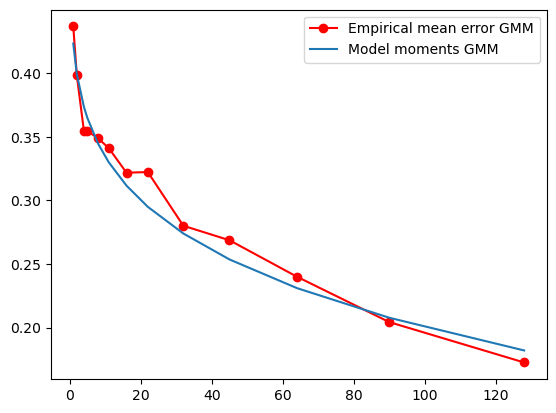

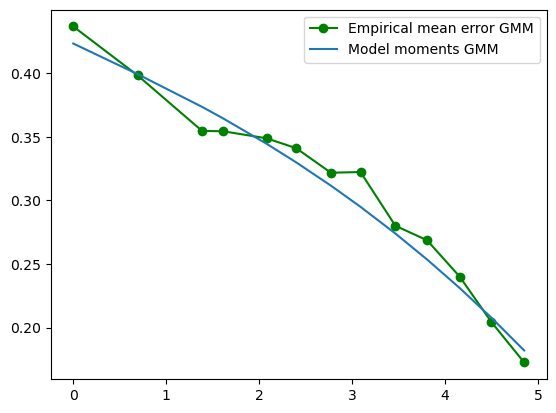

H =  0.09563115496725667 lambda2 = 0.024142828481608418 T =  3.6957819139303605 lsigma2 = 4.5399929762484854e-05 p-Value=  0.3698296187783417 J =  10.843632669461146 J_95 =  18.30703805327515
------------------------------------------------------


(0.09563115496725667,
 0.024142828481608418,
 3.6957819139303605,
 4.5399929762484854e-05,
 0.3698296187783417,
 10.843632669461146,
 18.30703805327515,
 [array([0.43675268, 0.39824567, 0.35461713, 0.35440056, 0.34885267,
         0.34109   , 0.32178183, 0.32230281, 0.28008992, 0.26869315,
         0.24002112, 0.20432929, 0.17259234]),
  array([0.42335151, 0.39923571, 0.37353743, 0.36461007, 0.34457414,
         0.32996384, 0.31160702, 0.29494317, 0.27399516, 0.25358748,
         0.23105953, 0.20776032, 0.18203959]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [39]:
# Synthetic index construction from those stocks
weights = [0.25,0.25,0.5]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(Stocks_test_synthindex_symbols,weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

#### Conclusion : No surprise again !
#### - Single assets have very low estimated hurst index than the synthetic index constructed above

Checking the statistical correlation between stocks 

In [40]:
Stocks_test_synthindex_symbols = ["TSLA","AAPL","NVDA"]
logvol_synthesis_yf_check = realized_vol_data_obj_yf.LogVolSynthesisOverAssets(Stocks_test_synthindex_symbols)
logvol_synthesis_yf_check

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'TSLA': array([-3.15741392, -3.40710533, -3.74088051, ..., -5.77955743,
        -6.35261503, -6.40729513]),
 'AAPL': array([-11.57375652, -12.94782852, -12.79575501, ...,  -8.81854766,
         -7.21553628,  -7.66721604]),
 'NVDA': array([-3.69682044, -5.12301607, -5.32765212, ..., -8.38881265,
        -6.33200897, -6.71223466])}

In [41]:
minlength = min(min(len(logvol_synthesis_yf_check['TSLA']),len(logvol_synthesis_yf_check['AAPL'])),len(logvol_synthesis_yf_check['NVDA']))
np.corrcoef([logvol_synthesis_yf_check['TSLA'][:minlength],logvol_synthesis_yf_check['AAPL'][:minlength],logvol_synthesis_yf_check['NVDA'][:minlength]])

array([[ 1.        , -0.06330796,  0.14549829],
       [-0.06330796,  1.        , -0.13850018],
       [ 0.14549829, -0.13850018,  1.        ]])

#### - The correlation of assets forming the index may impact the estimated H of the index, let's check this : 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.0018702738999223766
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.24146224e-05, -3.88144380e-09,  6.46618176e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 424
      nit: 38
     njev: 106
   status: 0
  success: True
        x: array([-6.78083239, -2.77053218,  0.0123021 ])
*******************************
Objective function value after calibration =  0.004549899200160277


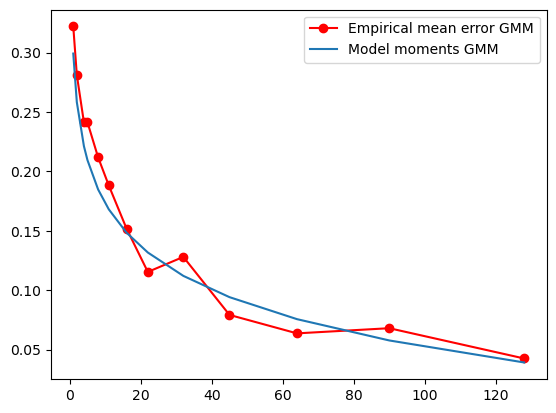

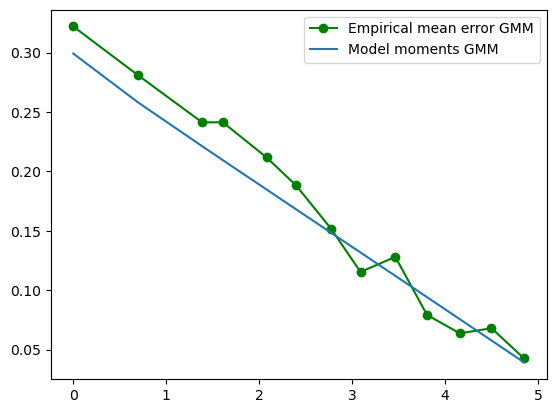

H =  0.0011364121805394203 lambda2 = 0.051970778708067614 T =  1.0127995386291837 lsigma2 = 4.5399929762484854e-05 p-Value=  0.16484915340635214 J =  14.182035806899583 J_95 =  18.30703805327515
------------------------------------------------------


(0.0011364121805394203,
 0.051970778708067614,
 1.0127995386291837,
 4.5399929762484854e-05,
 0.16484915340635214,
 14.182035806899583,
 18.30703805327515,
 [array([0.32203726, 0.28122012, 0.2413547 , 0.24138406, 0.21186264,
         0.18823401, 0.15195774, 0.1154197 , 0.12808491, 0.07924346,
         0.06371301, 0.06805347, 0.04256874]),
  array([0.29924806, 0.25835321, 0.22129329, 0.20953057, 0.18483855,
         0.16813378, 0.14848229, 0.13177537, 0.11210717, 0.09419911,
         0.07568431, 0.0577496 , 0.03920642]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [42]:
weights = [0.5,0.5]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(['TSLA','AAPL'],weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

In [43]:
minlength = min(min(len(logvol_synthesis_yf_check['TSLA']),len(logvol_synthesis_yf_check['AAPL'])),min(len(logvol_synthesis_yf['AMZN']),len(logvol_synthesis_yf_check['NVDA'])))
np.corrcoef([logvol_synthesis_yf_check['TSLA'][:minlength],logvol_synthesis_yf_check['AAPL'][:minlength],logvol_synthesis_yf_check['NVDA'][:minlength],logvol_synthesis_yf['AMZN'][:minlength]])

array([[ 1.        , -0.06330796,  0.14549829,  0.06848227],
       [-0.06330796,  1.        , -0.13850018, -0.18103971],
       [ 0.14549829, -0.13850018,  1.        ,  0.2673397 ],
       [ 0.06848227, -0.18103971,  0.2673397 ,  1.        ]])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.002074454912569695
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.07819657e-04, -1.77071900e-06, -2.57467485e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 256
      nit: 28
     njev: 64
   status: 0
  success: True
        x: array([-6.67839738, -2.66840891,  0.01510129])
*******************************
Objective function value after calibration =  0.0035981188112629457


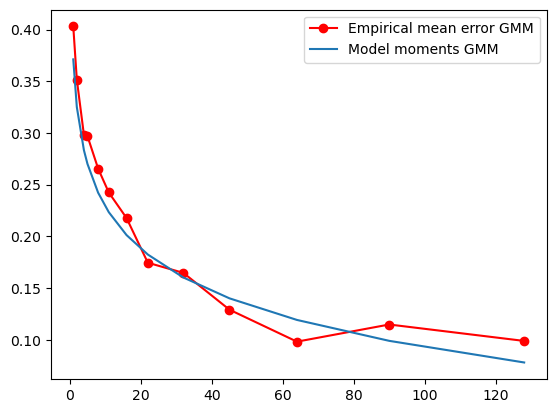

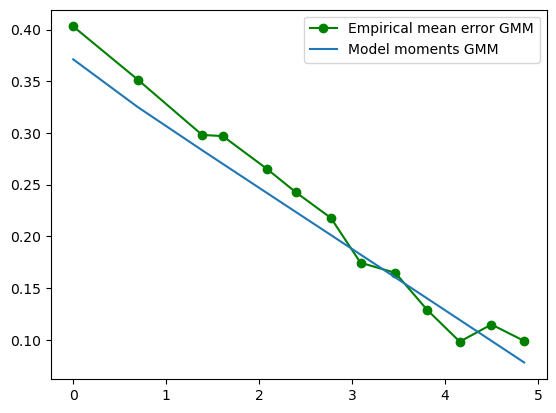

H =  0.0012603050514404795 lambda2 = 0.05852917891557896 T =  1.0156581836555543 lsigma2 = 4.5399929762484854e-05 p-Value=  0.34098935168876326 J =  11.2153363347066 J_95 =  18.30703805327515
------------------------------------------------------


(0.0012603050514404795,
 0.05852917891557896,
 1.0156581836555543,
 4.5399929762484854e-05,
 0.34098935168876326,
 11.2153363347066,
 18.30703805327515,
 [array([0.40296018, 0.35163038, 0.29812825, 0.2969362 , 0.26555417,
         0.24243531, 0.21777013, 0.17451016, 0.1647185 , 0.12908637,
         0.0981885 , 0.11477396, 0.0988922 ]),
  array([0.37115521, 0.32508681, 0.28332942, 0.27007415, 0.24224657,
         0.22341866, 0.20126759, 0.18243401, 0.1602603 , 0.14006916,
         0.11919213, 0.09896746, 0.07805484]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [44]:
weights = [0.15,0.65,0.1,0.1]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(['AMZN','TSLA','NVDA','AAPL'],weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
*******************************
res =        fun: 0.0007824803564879265
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.38437743e-07, 7.09176645e-08, 1.16269842e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 476
      nit: 54
     njev: 119
   status: 2
  success: False
        x: array([-2.002179  , -3.76525633,  1.42408167])
*******************************
Objective function value after calibration =  0.003385829884844958


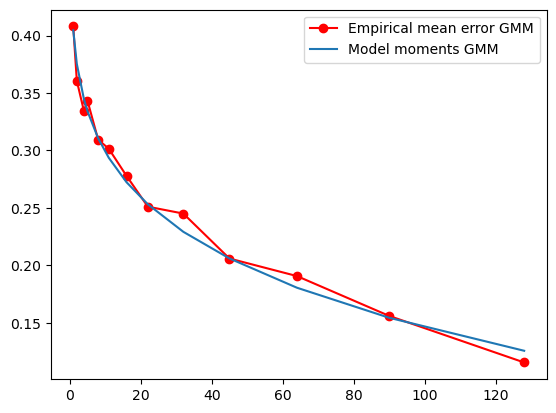

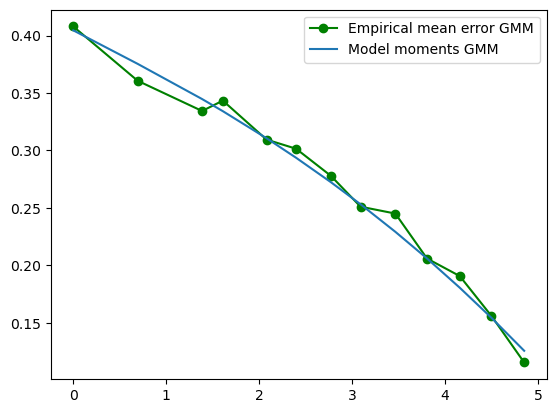

H =  0.08667674503639089 lambda2 = 0.02994416994950574 T =  2.9203074526760395 lsigma2 = 4.5399929762484854e-05 p-Value=  0.39333372461553495 J =  10.553631751061735 J_95 =  18.30703805327515
------------------------------------------------------


(0.08667674503639089,
 0.02994416994950574,
 2.9203074526760395,
 4.5399929762484854e-05,
 0.39333372461553495,
 10.553631751061735,
 18.30703805327515,
 [array([0.40785523, 0.36059583, 0.33430313, 0.34333388, 0.3094369 ,
         0.30145389, 0.27785003, 0.25105508, 0.24505202, 0.20592163,
         0.190664  , 0.15596586, 0.11547248]),
  array([0.40449328, 0.37532184, 0.34470036, 0.33415243, 0.3106293 ,
         0.29359723, 0.27233074, 0.25314505, 0.22917646, 0.2059752 ,
         0.18052197, 0.15436019, 0.12565814]),
  array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])

In [45]:
weights = [0.15,0.65,0.1,0.1]
logvol_synthetic_index_yf = realized_vol_data_obj_yf.LogVolSyntheticIndexFromData(['AMZN','AAPL','NVDA','TSLA'],weights)
GMM_obj_synthetic_index = GMM()
GMM_obj_synthetic_index.ComputeParamsGMM(logvol_synthetic_index_yf)

#### => The weights and the correlations impact together H estimate of the index     
#### not necessary the dimension (number of stocks)

# Mutlidimensional S-fbm model generation - independant marginals 

- ### Sanity check: 1 dimensional S fbm

In [46]:
size = 4000
H=0.09
S_fbm_model = Sfbm(H,0.068970 ,2**14) #T=0.732075
Sfbmcorrelation = S_fbm_model.SfbmCorrelation(size)
S_fbm_model_generation_example = S_fbm_model.GenerateSfbm(size)
S_fbm_model_logvolgeneration_example = S_fbm_model.GeneratelogVol(size)
S_fbm_model_logvolgeneration_example_qv = S_fbm_model_logvolgeneration_example[0]
print(S_fbm_model_logvolgeneration_example_qv)

[-0.67504454 -0.94279263 -0.15236982 ... -0.63904727 -0.01424484
  0.53163083]


*******************************
res =        fun: 0.0014668412447968885
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.30785140e-06, -7.03647214e-08, -6.59194921e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1164
      nit: 123
     njev: 291
   status: 2
  success: False
        x: array([-2.82120123, -2.34400487,  0.47007011])
*******************************
Objective function value after calibration =  0.00205075476085718


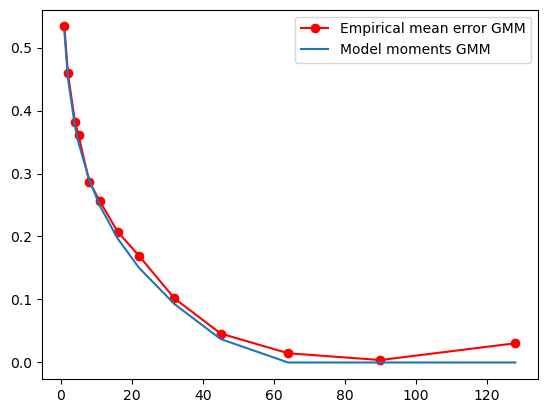

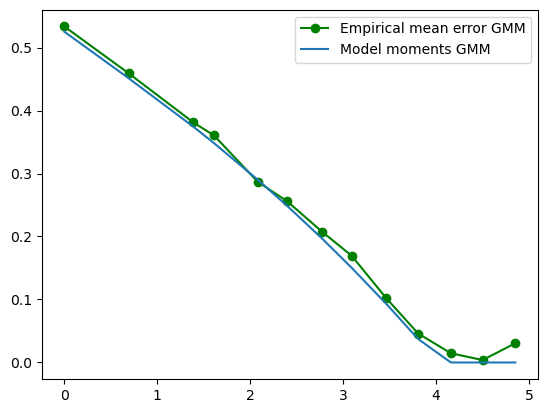

H =  0.07806813543662099 lambda2 = 0.07780376191695314 T =  1.8749113150971393 lsigma2 = 4.5399929762484854e-05 p-Value=  0.609213821810004 J =  8.200968288667863 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_param1d =  (0.07806813543662099, 0.07780376191695314, 1.8749113150971393, 4.5399929762484854e-05, 0.609213821810004, 8.200968288667863, 18.30703805327515, [array([0.53341865, 0.45886741, 0.38121597, 0.36047663, 0.28697342,
       0.2557675 , 0.20760784, 0.16946317, 0.10165991, 0.04596107,
       0.01465871, 0.00385015, 0.03053383]), array([0.52507176, 0.45103887, 0.37444641, 0.34827761, 0.29027319,
       0.24856005, 0.1967879 , 0.15035929, 0.09270222, 0.03723356,
       0.        , 0.        , 0.        ]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [49]:
GMM_1d = GMM()
index_estimatedGMM_param1d = GMM_1d.ComputeParamsGMM(S_fbm_model_logvolgeneration_example_qv,5,LagSignal=np.array([1, 2, 4, 5, 8, 11, 16, 22, 32, 45, 64, 90, 128]),
                         GMM_Method=1)
print("index_estimatedGMM_param1d = ", index_estimatedGMM_param1d)

- ### d dimensional S fbm

- d=1 

Recheck, for rough 

*******************************
res =        fun: 0.03232680347817571
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.70606326e-06, 3.46944697e-09, 2.08166818e-09])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 480
      nit: 63
     njev: 120
   status: 2
  success: False
        x: array([-1.66912342, -1.27694008,  1.29130757])
*******************************
Objective function value after calibration =  0.0012929111606215019


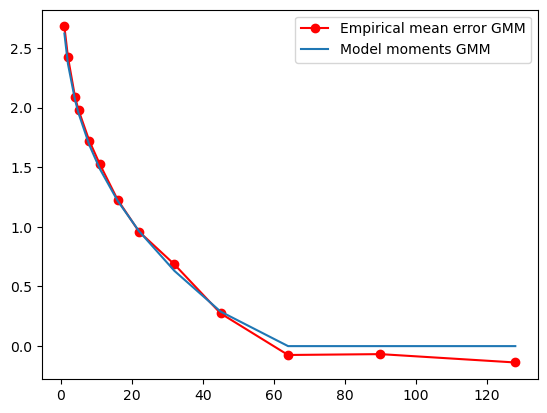

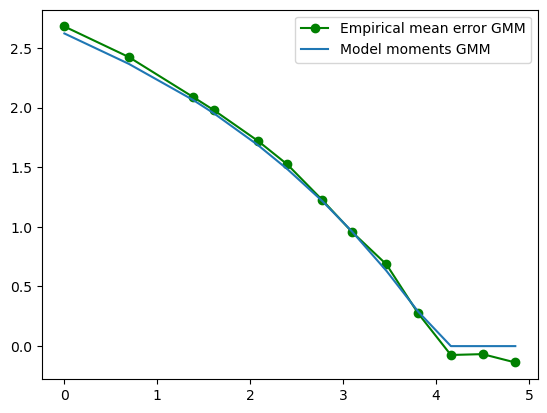

H =  0.16210685101279138 lambda2 = 0.20784678689156044 T =  3.740724579954509 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8795115550304089 J =  5.170351731325386 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.16210685101279138, 0.20784678689156044, 3.740724579954509, 4.5399929762484854e-05, 0.8795115550304089, 5.170351731325386, 18.30703805327515, [array([ 2.68006454,  2.42376848,  2.08809296,  1.97783989,  1.72237817,
        1.52389569,  1.22708897,  0.96062665,  0.68477839,  0.27435501,
       -0.07439375, -0.06717872, -0.13719758]), array([2.62149054, 2.36656828, 2.06336535, 1.95126422, 1.68749824,
       1.48479542, 1.21803155, 0.96445853, 0.6306117 , 0.2895469 ,
       0.        , 0.        , 0.        ]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [51]:
dimension = 1
Hs = [0.15 for i in range(dimension)]
weights = np.random.randint(1, 10, dimension)

weights = weights / np.sum(weights)

#Sfbms = [Sfbm(H=Hs[i]) for i in range(dimension)]
Sfbms = [Sfbm(Hs[i], 0.02,2**14) for i in range(dimension)]  # 0.068970
MultidimensionalSfbms = MultidimensionalSfbm(Sfbms)
Sfbms_generation_example = MultidimensionalSfbms.GenerateMultidimensionalSfbm(4000)
index_builder_Sfbms = MultidimensionalSfbms.Index_Builder(weights, Sfbms_generation_example,'mrm and mrw')
log_vol_index_generation_direct_Sfbms = MultidimensionalSfbms.GeneratelogVolMultidimSfbm_Index(weights,'quadratic variation estimate',4000)

GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_direct_Sfbms,10)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)

Checking robustness

indices_trajectories =  [(array([ -0.35057868,   0.08282274,   0.86972985, ..., -21.38210644,
       -21.42071047, -22.4946797 ]), array([2.45600872e-02, 2.02821989e-01, 5.13818635e-01, ...,
       1.03473026e+05, 1.03473112e+05, 1.03473216e+05])), (array([-1.11981889e+00, -1.62786301e+00, -5.58615709e-02, ...,
        3.36755964e+02,  3.37940046e+02,  3.38249632e+02]), array([8.66199884e-01, 5.68336846e+00, 9.35381229e+00, ...,
       1.17231558e+05, 1.17233388e+05, 1.17235399e+05])), (array([-2.36942738e-01,  3.98140624e-01,  8.15277695e-01, ...,
       -3.57129452e+02, -3.57067569e+02, -3.56879761e+02]), array([1.70104662e-02, 2.17208658e-01, 4.14440241e-01, ...,
       1.03475959e+05, 1.03476020e+05, 1.03476045e+05])), (array([ 1.68496796e-03, -1.50562772e-01, -9.59093711e-02, ...,
       -1.23470563e+02, -1.23307596e+02, -1.23249502e+02]), array([4.57084313e-03, 2.08187723e-02, 3.09686145e-02, ...,
       9.49543809e+04, 9.49544083e+04, 9.49544262e+04])), (array([ 6.10845798e-02, 

*******************************
res =        fun: 0.020785304190832826
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.54494474e-06, -3.64291932e-08, -1.49533165e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 768
      nit: 104
     njev: 192
   status: 2
  success: False
        x: array([-1.68957832, -1.35657352,  1.22186283])
*******************************
Objective function value after calibration =  0.001375602275998906
H =  0.1319448777262985 lambda2 = 0.23379213859174972 T =  2.8810887889668395 lsigma2 = 4.5399929762484854e-05 p-Value=  0.855299775874913 J =  5.501033501713515 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.05589737779811454
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.55837020e-06, -1.29757315e-07,  5.55111510e-09])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1104
      nit: 125
     njev: 27

Objective function value after calibration =  0.0011789546347998532
H =  0.18825256473378907 lambda2 = 0.18058258429208296 T =  4.697258791060597 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9094073251375657 J =  4.714639584564613 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.3028530250493196
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.39914631, -0.0198281 ,  1.11982489])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 680
      nit: 26
     njev: 170
   status: 2
  success: False
        x: array([-5.13161607,  0.38920763,  0.04884434])
*******************************
Objective function value after calibration =  0.0043374669865160875
H =  0.14787691404744166 lambda2 = 0.20567816420508805 T =  3.2542928408127247 lsigma2 = 4.5399929762484854e-05 p-Value=  0.06705945018246702 J =  17.345530479077834 J_95 =  18.30703805327515
-------------------------------------

*******************************
res =        fun: 0.11923480742515588
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.50389728e-05, -1.14644405e-05, -4.58535985e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 712
      nit: 64
     njev: 178
   status: 0
  success: True
        x: array([-2.4075969 , -0.56713759,  0.71602874])
*******************************
Objective function value after calibration =  0.0045121235594892395
H =  0.11235064877147662 lambda2 = 0.2750353089131963 T =  2.634816009455203 lsigma2 = 4.5399929762484854e-05 p-Value=  0.05422624239411345 J =  18.04398211439747 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.014013700404989298
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.58153006e-05, 3.38271080e-08, 1.57859837e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 400
      nit: 41
 

Objective function value after calibration =  0.0033874939383623202
H =  0.15982128027536166 lambda2 = 0.21111642473586695 T =  3.262987242803904 lsigma2 = 4.5399929762484854e-05 p-Value=  0.19469536471381796 J =  13.54658825951092 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.21529730957768523
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([7.23587861e-06, 2.49800182e-07, 2.71449531e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 388
      nit: 30
     njev: 97
   status: 2
  success: False
        x: array([-1.90337385, -1.03376986,  1.11672447])
*******************************
Objective function value after calibration =  0.008517338169640946
H =  0.15068161551056558 lambda2 = 0.215948434275176 T =  3.5634087482591217 lsigma2 = 4.5399929762484854e-05 p-Value=  0.00018036640921927216 J =  34.06083534035441 J_95 =  18.30703805327515
----------------------------

*******************************
res =        fun: 0.015442243301787463
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.82891897e-06,  2.13370989e-08, -5.25621216e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 288
      nit: 32
     njev: 72
   status: 0
  success: True
        x: array([-1.94168823, -1.15621322,  1.08539818])
*******************************
Objective function value after calibration =  0.0010087399392794908
H =  0.11843269620296128 lambda2 = 0.25829354856322695 T =  2.7719618911406103 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9458023930314927 J =  4.033951017178683 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.01814801029282163
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.25455203e-06, -9.60689867e-07, -1.09287580e-07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.002298913366383746
H =  0.14701613318805754 lambda2 = 0.21752736077022836 T =  3.396826431256555 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5138572384570395 J =  9.193354552168602 J_95 =  18.30703805327515
------------------------------------------------------


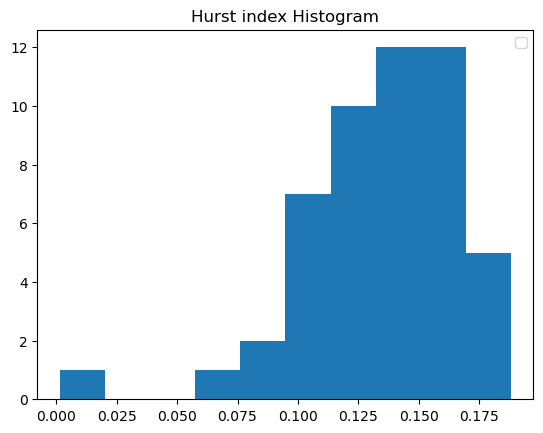

In [59]:
Number_indices = 50
dimension = 1
H = 0.15
Hs = [H for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]


for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(Hs[i],0.02 ,2**14) for i in range(dimension)])

Multiple_Hs=[Hs for i in range(Number_indices)]
Multiple_lambdasquare_list=[lambdasquare_list for i in range(Number_indices)]
Multiple_T_list=[T_list for i in range(Number_indices)]
Multiple_sigma_list=[sigma_list for i in range(Number_indices)]
Multiple_correlations = [{} for i in range(Number_indices)]

MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)
MultipleIndicesConstructor_obj =MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'direct',keys)
Index_trajectories_synthesis = log_vol_indices_dic[1]
GMM_index_trajectories_obj = GMM()
GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram',"",10)

Recheck, for multifractal

indices_trajectories =  [(array([ 6.73048375e-03,  1.42405751e+00,  1.34793468e+00, ...,
       -1.55154228e+02, -1.55737517e+02, -1.52937213e+02]), array([2.68867987e-02, 2.88573063e-01, 3.92725306e-01, ...,
       1.17179262e+05, 1.17180084e+05, 1.17182766e+05])), (array([-4.65209035e-02,  6.89132911e-02,  4.94532118e-01, ...,
        1.08197190e+02,  1.06419552e+02,  1.06300751e+02]), array([2.28794986e-03, 1.06268282e-01, 2.06692845e-01, ...,
       1.31431861e+05, 1.31432691e+05, 1.31432970e+05])), (array([-3.06119775e-02, -1.23353083e-01, -1.04638974e+00, ...,
       -1.75924933e+02, -1.75522350e+02, -1.75905908e+02]), array([2.09814749e-03, 2.09999885e-01, 7.29736982e-01, ...,
       1.28409638e+05, 1.28409724e+05, 1.28409847e+05])), (array([-5.88423313e-02, -1.25851580e+00, -1.41736006e+00, ...,
        1.05156832e+02,  1.05099144e+02,  1.04754384e+02]), array([2.55708971e-02, 5.55252195e-01, 6.28740869e-01, ...,
       1.46195532e+05, 1.46195661e+05, 1.46195864e+05])), (array(

*******************************
res =        fun: 0.0036374131124069157
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.48865860e-04, -1.33617077e-07, -1.66372558e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 440
      nit: 28
     njev: 110
   status: 2
  success: False
        x: array([-7.09443368, -1.79660807,  0.00711264])
*******************************
Objective function value after calibration =  0.002450781828801474
H =  0.000829181441880054 lambda2 = 0.13565930936237103 T =  1.0071813206657496 lsigma2 = 4.5399929762484854e-05 p-Value=  0.4581513653745176 J =  9.800676533377095 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.002739082803373873
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.91908730e-06, -6.15089580e-07,  3.04817369e-04])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 388
      nit: 32
     njev: 

Objective function value after calibration =  0.006030280764392123
H =  0.0008298240012323947 lambda2 = 0.1305620956631931 T =  1.0067610382517307 lsigma2 = 4.5399929762484854e-05 p-Value=  0.007300690232099222 J =  24.1150927768041 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.007547140227666466
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.02508194e-04, -1.35030876e-06,  5.49437058e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 472
      nit: 33
     njev: 118
   status: 0
  success: True
        x: array([-7.17737578e+00, -1.66398657e+00,  6.09366720e-03])
*******************************
Objective function value after calibration =  0.0044950647284564375
H =  0.0007629611147953776 lambda2 = 0.13595170899721518 T =  1.0062378229175646 lsigma2 = 4.5399929762484854e-05 p-Value=  0.05537384965746922 J =  17.975763849097287 J_95 =  18.307038

*******************************
res =        fun: 0.001761673979479319
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.63588849e-04, 3.22983829e-07, 3.58514867e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 616
      nit: 39
     njev: 154
   status: 2
  success: False
        x: array([-7.17342940e+00, -1.75705048e+00,  6.46536668e-03])
*******************************
Objective function value after calibration =  0.0017516261081284919
H =  0.0007666132658394861 lambda2 = 0.13794103928532708 T =  1.0065195555250988 lsigma2 = 4.5399929762484854e-05 p-Value=  0.7249961831563525 J =  7.004752806405839 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.016350512437996432
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.22701849e-04, 4.05925296e-07, 6.41115286e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 328
 

Objective function value after calibration =  0.003195748651255547
H =  0.0008308840096088843 lambda2 = 0.14536280430594595 T =  1.006683558707026 lsigma2 = 4.5399929762484854e-05 p-Value=  0.23624545067647318 J =  12.779798856370933 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.014836665978453241
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.80975202e-04, -6.86499473e-06, -5.79883364e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 476
      nit: 41
     njev: 119
   status: 0
  success: True
        x: array([-7.49905415e+00, -1.49825722e+00,  4.78669334e-03])
*******************************
Objective function value after calibration =  0.005484649167527368
H =  0.0005522405721758572 lambda2 = 0.1488309891173051 T =  1.0049288326459311 lsigma2 = 4.5399929762484854e-05 p-Value=  0.015449002301785057 J =  21.933112020941945 J_95 =  18.307038

*******************************
res =        fun: 0.0006113817411197945
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.62565882e-05, 1.16660154e-08, 1.75229514e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 396
      nit: 38
     njev: 99
   status: 0
  success: True
        x: array([-7.18246655, -1.80289138,  0.00726073])
*******************************
Objective function value after calibration =  0.0021699034227812323
H =  0.0007589552442937111 lambda2 = 0.13280105453666172 T =  1.0073963762640958 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5629642803340889 J =  8.677443787702062 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.002211027514047181
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.37433035e-05, -1.30273397e-06,  1.24483757e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.003453348586468852
H =  0.0014251134130899145 lambda2 = 0.13311694347362435 T =  1.0125412961822033 lsigma2 = 4.5399929762484854e-05 p-Value=  0.18183863746418735 J =  13.809940997288939 J_95 =  18.30703805327515
------------------------------------------------------


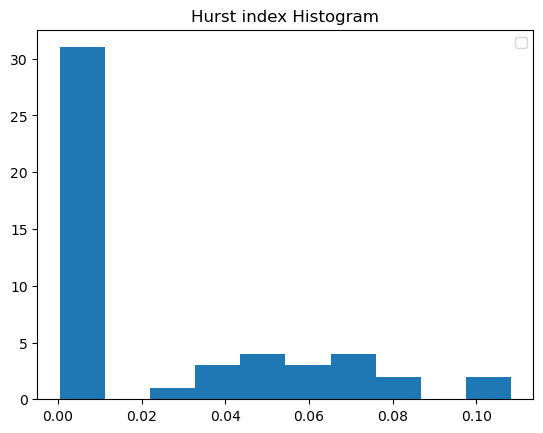

In [61]:
Number_indices = 50
dimension = 1
H = 0.05
Hs = [H for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]


for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(Hs[i],0.02 ,2**14) for i in range(dimension)])

Multiple_Hs=[Hs for i in range(Number_indices)]
Multiple_lambdasquare_list=[lambdasquare_list for i in range(Number_indices)]
Multiple_T_list=[T_list for i in range(Number_indices)]
Multiple_sigma_list=[sigma_list for i in range(Number_indices)]
Multiple_correlations = [{} for i in range(Number_indices)]

MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)
MultipleIndicesConstructor_obj =MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'direct',keys)
Index_trajectories_synthesis = log_vol_indices_dic[1]
GMM_index_trajectories_obj = GMM()
GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram',"",10)

Idea: construct an estimator (of les variance (divided by Num)) as the mean of the Hs over the multiple robustness steps above => similar to cross validation

#### Conclusion : H estimation is robust in some sense for 1D Sfbm models =>coherent with the asymptotic normality in "A GMM approach to estimate the roughness of stochastic volatility"
#### Difficult to capture multifractal models H->0 =>coherent with  "A GMM approach to estimate the roughness of stochastic volatility"

- d>1

*******************************
res =        fun: 1.1198461808986298
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.93958184e-03, -2.39808153e-06,  1.99840145e-07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 776
      nit: 77
     njev: 194
   status: 0
  success: True
        x: array([-3.29600942, 12.71262461,  0.33685896])
*******************************
Objective function value after calibration =  0.007999918058612858


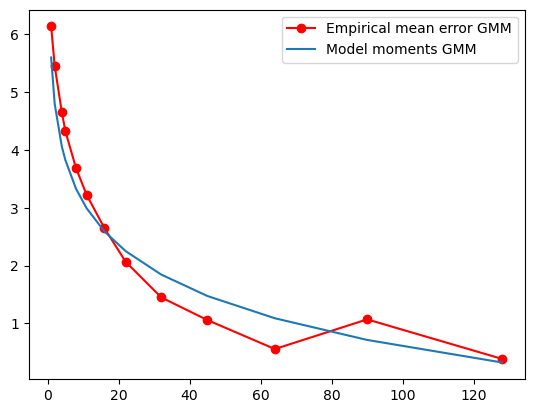

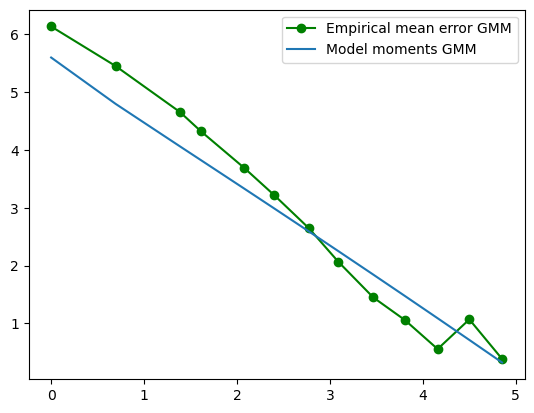

H =  0.008900044926259579 lambda2 = 0.9999969868436347 T =  1.0958867627250437 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0004017191954538944 J =  31.99167231639282 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.008900044926259579, 0.9999969868436347, 1.0958867627250437, 4.5399929762484854e-05, 0.0004017191954538944, 31.99167231639282, 18.30703805327515, [array([6.13412653, 5.45083253, 4.65458337, 4.32517346, 3.68616405,
       3.22159104, 2.64749221, 2.06479901, 1.45031814, 1.05827993,
       0.55729295, 1.07006815, 0.38658596]), array([5.59752551, 4.79663465, 4.0609115 , 3.8256377 , 3.32904297,
       2.99100237, 2.59117614, 2.249422  , 1.84491906, 1.47456272,
       1.08959176, 0.71466992, 0.32493654]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [62]:
dimension = 2
Hs = [0.12 for i in range(dimension)]
weights = np.random.randint(1, 10, dimension)

weights = weights / np.sum(weights)

#Sfbms = [Sfbm(H=Hs[i]) for i in range(dimension)] 
Sfbms = [Sfbm(Hs[i], 0.068970 ,2**14) for i in range(dimension)]
MultidimensionalSfbms = MultidimensionalSfbm(Sfbms)
Sfbms_generation_example = MultidimensionalSfbms.GenerateMultidimensionalSfbm(4000)
index_builder_Sfbms = MultidimensionalSfbms.Index_Builder(weights, Sfbms_generation_example,'mrm and mrw')
log_vol_index_generation_direct_Sfbms = MultidimensionalSfbms.GeneratelogVolMultidimSfbm_Index(weights,'quadratic variation estimate',4000)

GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_direct_Sfbms,10)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)


#### Let's plot the Hat{H} distribution over multiple index trajectories :  Rough independant processes 

*******************************
res =        fun: 0.011951527571293228
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.43607219e-06, -5.18682322e-08, -6.08367520e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 776
      nit: 75
     njev: 194
   status: 2
  success: False
        x: array([-2.59730265, -1.23261102,  0.57792017])
*******************************
Objective function value after calibration =  0.001439383199691374
H =  0.08534438682500203 lambda2 = 0.1935068375149103 T =  2.0405952341899902 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8353219669143319 J =  5.756093415565804 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.07803552181210732
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.64291932e-06, -2.67841306e-07, -6.93889395e-07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 260
      nit: 3

Objective function value after calibration =  0.0016307566805520764
H =  0.11395178051211205 lambda2 = 0.1899994707960254 T =  2.5280080315085747 lsigma2 = 4.5399929762484854e-05 p-Value=  0.7697228019276697 J =  6.521395965527754 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.050164210729296374
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.70520136e-03, 5.86891647e-06, 2.43634279e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 404
      nit: 44
     njev: 101
   status: 0
  success: True
        x: array([-6.12674234, -0.38630139,  0.02033506])
*******************************
Objective function value after calibration =  0.0038834378887079523
H =  0.06638672413835184 lambda2 = 0.2363476164581063 T =  1.829615262357585 lsigma2 = 4.5399929762484854e-05 p-Value=  0.11390467889294288 J =  15.529868116943101 J_95 =  18.30703805327515
------------

*******************************
res =        fun: 0.02068484526069124
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.92501616e-07, 1.38777879e-09, 6.93889395e-10])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 304
      nit: 30
     njev: 76
   status: 2
  success: False
        x: array([-1.75556257, -1.63726945,  1.17850995])
*******************************
Objective function value after calibration =  0.0015856699906673939
H =  0.14424711415696184 lambda2 = 0.16438269507933836 T =  3.168986205802531 lsigma2 = 4.5399929762484854e-05 p-Value=  0.7858382919274548 J =  6.341094292678908 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.02645284514473812
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.27394494e-05, -1.66880398e-07, -4.62824224e-07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 564
      nit: 84
  

Objective function value after calibration =  0.006613503757761066
H =  0.10283718988003372 lambda2 = 0.1725807053613478 T =  2.142920889711546 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0031828410070342426 J =  26.447401527286505 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.018865607524697285
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.08805128, 0.0064653 , 0.37518755])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1360
      nit: 144
     njev: 340
   status: 0
  success: True
        x: array([-3.23546657, -0.95392796,  0.34065874])
*******************************
Objective function value after calibration =  0.004440682160637719
H =  0.03785265186140665 lambda2 = 0.27809556333702623 T =  1.4058733873822313 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0591804572440339 J =  17.758287960390238 J_95 =  18.30703805327515
--------------------

*******************************
res =        fun: 0.016115626156420773
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([7.33996202e-06, 3.62557209e-07, 2.26034468e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 656
      nit: 76
     njev: 164
   status: 0
  success: True
        x: array([-2.36320451, -1.36064819,  0.68215086])
*******************************
Objective function value after calibration =  0.002621047127718163
H =  0.08700207447294347 lambda2 = 0.191401361004841 T =  2.017954220064734 lsigma2 = 4.5399929762484854e-05 p-Value=  0.3993062172473661 J =  10.481567463745874 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.01044748464579317
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.01073664e-05, -7.11236629e-08, -3.09301194e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 500
      nit: 63
   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.006401910753221832
H =  0.13358536652776004 lambda2 = 0.19871621832970843 T =  2.928780935723993 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0043151771818360635 J =  25.60124110211882 J_95 =  18.30703805327515
------------------------------------------------------


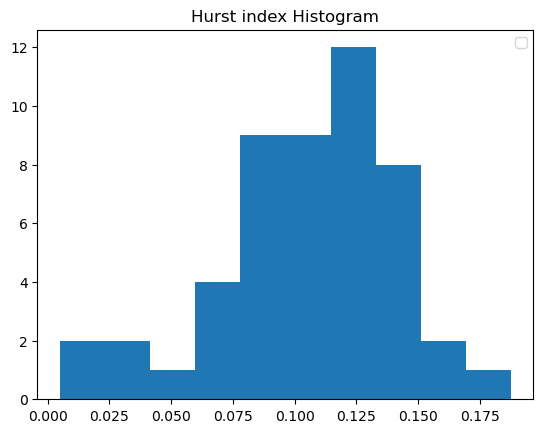

In [2]:
Number_indices = 50
dimension = 2
H = 0.15
Hs = [H for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]


for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(Hs[i],0.02 ,2**14) for i in range(dimension)])

Multiple_Hs=[Hs for i in range(Number_indices)]
Multiple_lambdasquare_list=[lambdasquare_list for i in range(Number_indices)]
Multiple_T_list=[T_list for i in range(Number_indices)]
Multiple_sigma_list=[sigma_list for i in range(Number_indices)]
Multiple_correlations = [{} for i in range(Number_indices)]

MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)
MultipleIndicesConstructor_obj =MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'direct',keys)
Index_trajectories_synthesis = log_vol_indices_dic[1]
GMM_index_trajectories_obj = GMM()
GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram',"",10)

#### Let's plot the Hat{H} distribution over multiple index trajectories :  Multifractal independant processes 

*******************************
res =        fun: 0.002012536555493079
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.63864583e-05, -7.64145696e-08,  4.62739222e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 280
      nit: 29
     njev: 70
   status: 0
  success: True
        x: array([-6.79955677, -2.91233103,  0.00883334])
*******************************
Objective function value after calibration =  0.0068005050107645335
H =  0.0011122305660236657 lambda2 = 0.05272444948381631 T =  1.0087124214968335 lsigma2 = 4.5399929762484854e-05 p-Value=  0.002425363512713386 J =  27.195219538047358 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0016405518949368606
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.59704716e-05, -2.48412403e-07, -1.97277090e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 336
     

Objective function value after calibration =  0.0026202462919929143
H =  0.0011459084013283336 lambda2 = 0.0772517875216982 T =  1.0090872798054364 lsigma2 = 4.5399929762484854e-05 p-Value=  0.39957282784073794 J =  10.478364921679665 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0006010006520775003
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.2865013e-05, 4.7378551e-07, 1.6572247e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 368
      nit: 29
     njev: 92
   status: 2
  success: False
        x: array([-6.80425579, -2.89832447,  0.00937747])
*******************************
Objective function value after calibration =  0.002372982535282761
H =  0.0011081536719158575 lambda2 = 0.052795778926221594 T =  1.0092599284655708 lsigma2 = 4.5399929762484854e-05 p-Value=  0.48635614532040905 J =  9.489557158595822 J_95 =  18.30703805327515
------------------------

*******************************
res =        fun: 0.0019158766217900068
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.12870000e-05, 8.31583071e-08, 2.03494339e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 468
      nit: 36
     njev: 117
   status: 0
  success: True
        x: array([-6.78294221, -2.85199659,  0.00914757])
*******************************
Objective function value after calibration =  0.006717789016239246
H =  0.001131338314340707 lambda2 = 0.0500875410457874 T =  1.0092030238586522 lsigma2 = 4.5399929762484854e-05 p-Value=  0.002736058729707167 J =  26.864438275940746 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0009489068138148017
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.15989662e-05, -3.01950307e-08,  1.00174860e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nf

Objective function value after calibration =  0.00361616269023678
H =  0.08751595366864062 lambda2 = 0.03587098213920885 T =  2.0413108679475664 lsigma2 = 4.5399929762484854e-05 p-Value=  0.15298166882460515 J =  14.461034598256884 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.00020211569302752463
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 7.62657899e-06, -4.68917442e-10, -4.24058575e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 352
      nit: 32
     njev: 88
   status: 0
  success: True
        x: array([-6.79582281, -2.93869539,  0.0087059 ])
*******************************
Objective function value after calibration =  0.0011262341207542474
H =  0.0011170915586115665 lambda2 = 0.05030963013140256 T =  1.008754425059639 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9217713066868776 J =  4.503810248896235 J_95 =  18.30703805327515
------

*******************************
res =        fun: 0.000428635168721098
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.35399940e-06, -1.95129287e-07,  2.45220402e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 436
      nit: 30
     njev: 109
   status: 0
  success: True
        x: array([-6.78217489, -3.03686973,  0.0090608 ])
*******************************
Objective function value after calibration =  0.002367025525187354
H =  0.0010825888118161588 lambda2 = 0.04738758415757342 T =  1.0086184884090545 lsigma2 = 4.5399929762484854e-05 p-Value=  0.48854579871608794 J =  9.465735075224229 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0008027699501062185
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.38081887e-05, 1.65601041e-07, 4.33088027e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 840
      nit:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.0032955688014858287
H =  0.001138781246891624 lambda2 = 0.09352567311110041 T =  1.0091768064452284 lsigma2 = 4.5399929762484854e-05 p-Value=  0.21383634819839295 J =  13.178979637141829 J_95 =  18.30703805327515
------------------------------------------------------


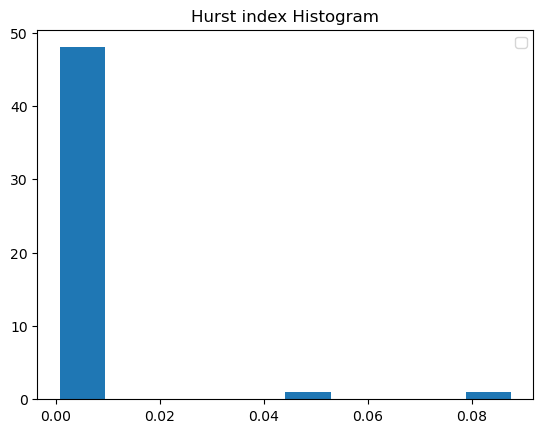

In [4]:
Number_indices = 50
dimension = 2
H = 0.01
Hs = [H for i in range(dimension)]
Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]


for i in range(Number_indices):
    weights = np.random.randint(1, 10, dimension)
    weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([Sfbm(Hs[i],0.02 ,2**14) for i in range(dimension)])

Multiple_Hs=[Hs for i in range(Number_indices)]
Multiple_lambdasquare_list=[lambdasquare_list for i in range(Number_indices)]
Multiple_T_list=[T_list for i in range(Number_indices)]
Multiple_sigma_list=[sigma_list for i in range(Number_indices)]
Multiple_correlations = [{} for i in range(Number_indices)]

MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)
MultipleIndicesConstructor_obj =MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'direct',keys)
Index_trajectories_synthesis = log_vol_indices_dic[1]
GMM_index_trajectories_obj = GMM()
GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram',"",10)

# Multidimensional S-fbm model generation - correlated brownians dW_t

### - Classical approach: fixed correlated brownians with independant w

- d=3

*******************************
res =        fun: 0.005715487410662443
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.69085929e-06,  1.05124243e-07, -1.31249699e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 420
      nit: 35
     njev: 105
   status: 0
  success: True
        x: array([-6.5880797 , -1.44009786,  0.0114579 ])
*******************************
Objective function value after calibration =  0.0010780272553478417


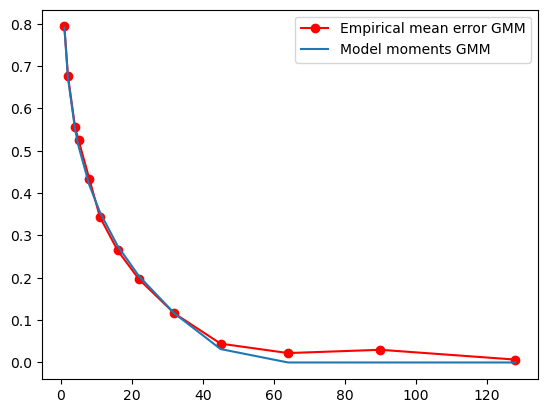

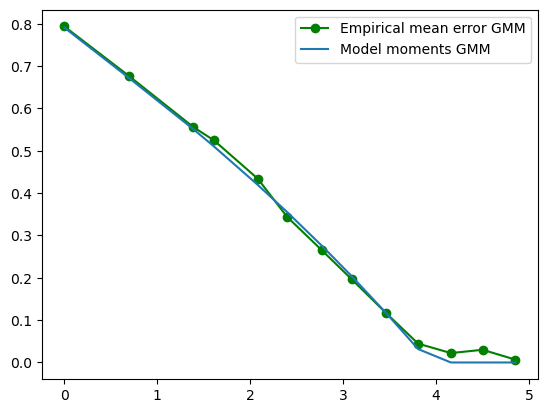

H =  0.07046704026442407 lambda2 = 0.12708259137483022 T =  1.7401340246501276 lsigma2 = 4.5399929762484854e-05 p-Value=  0.93222695783911 J =  4.311030994119281 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.07046704026442407, 0.12708259137483022, 1.7401340246501276, 4.5399929762484854e-05, 0.93222695783911, 4.311030994119281, 18.30703805327515, [array([0.79346005, 0.6768408 , 0.5561069 , 0.52452389, 0.43426306,
       0.34356565, 0.26455141, 0.19657637, 0.11572603, 0.04445888,
       0.02221917, 0.02995759, 0.00683161]), array([0.79071225, 0.67222715, 0.5512132 , 0.51016459, 0.4196671 ,
       0.3549777 , 0.27511272, 0.20386738, 0.1158578 , 0.03164783,
       0.        , 0.        , 0.        ]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [6]:
dimension = 3
H = 0.05
Hs = [0.001236,0.064988 ,0.023365 ]
weights = np.array([0.2,0.7,0.1])
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]
Sfbms = []#[Sfbm(Hs[i],0.068970 ,2**14) for i in range(dimension)] #
correlations = {(0,1):-0.06368572,(0,2):0.9,(1,2):-0.13849021}  # => H increases by ~ 10

MultidimensionalSfbms_generalmodel = MultidimensionalSfbm(Sfbms, correlations,dimension,Hs,lambdasquare_list,T_list,sigma_list )
log_vol_index_generation_generalmodel_Sfbms = MultidimensionalSfbms_generalmodel.GeneratelogVolMultidimSfbm_Index(weights,'quadratic variation estimate',4000)


GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_generalmodel_Sfbms,10)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)

Checking robustness

*******************************
res =        fun: 0.23975396539327615
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.01107652, -0.00026311, -0.00300343])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 524
      nit: 43
     njev: 131
   status: 0
  success: True
        x: array([-6.30659228, -0.13178211,  0.01793462])
*******************************
Objective function value after calibration =  0.016363842567485798
H =  0.001855813372142929 lambda2 = 0.46458676719621383 T =  0.3746236215288879 lsigma2 = 4.5399929762484854e-05 p-Value=  3.340355054337888e-10 J =  65.4390064273757 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 1.5657027262491283
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.88822290e-03, -8.48654485e-05, -6.79234451e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 596
      nit: 69
     njev

*******************************
res =        fun: 0.08839875287910898
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.01930084, 0.00494371, 0.00488875])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1628
      nit: 242
     njev: 407
   status: 2
  success: False
        x: array([-0.23156002, -3.85596222,  6.29499371])
*******************************
Objective function value after calibration =  6.734264332528773e-05
H =  0.43251974352418276 lambda2 = 0.026140378631296052 T =  491.7982796544991 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9999996702208058 J =  0.26930323065775613 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0024787234081908517
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.22606960e-05, -8.46935374e-07,  4.69417040e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 452
      nit: 32
     n

Objective function value after calibration =  nan
H =  0.1593284666751555 lambda2 = nan T =  9.192813852487483 lsigma2 = 4.5399929762484854e-05 p-Value=  nan J =  nan J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: nan
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([nan, nan, nan])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 88
      nit: 0
     njev: 22
   status: 2
  success: False
        x: array([-1.716986  ,         nan,  2.11806455])
*******************************
Objective function value after calibration =  nan
H =  0.15225979395507055 lambda2 = nan T =  8.315028544510133 lsigma2 = 4.5399929762484854e-05 p-Value=  nan J =  nan J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.008940822270068333
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.877944

Objective function value after calibration =  nan
H =  0.09868935514033401 lambda2 = nan T =  3.906987968685792 lsigma2 = 4.5399929762484854e-05 p-Value=  nan J =  nan J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.3029707099977411
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.88331598e-04, 9.08495507e-05, 8.04190053e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 480
      nit: 49
     njev: 120
   status: 0
  success: True
        x: array([-0.35762926, -3.23608222,  4.63805429])
*******************************
Objective function value after calibration =  0.00018940155608351293
H =  0.3916905695769173 lambda2 = 0.051852285427615614 T =  86.78740538959215 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9999525850318494 J =  0.7574168227779682 J_95 =  18.30703805327515
------------------------------------------------------
*********************

Objective function value after calibration =  nan
H =  0.1294190429347867 lambda2 = nan T =  6.018624198049355 lsigma2 = 4.5399929762484854e-05 p-Value=  nan J =  nan J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 1.816767078205658
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.60025345e-03, -1.29229960e-05, -8.01581029e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 624
      nit: 66
     njev: 156
   status: 2
  success: False
        x: array([-2.17278926,  0.13955563,  1.0139714 ])
*******************************


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.0015537186939801962
H =  0.2784463049678044 lambda2 = 0.09052234172514216 T =  12.303350973245573 lsigma2 = 4.5399929762484854e-05 p-Value=  0.7970337509959527 J =  6.213321057221577 J_95 =  18.30703805327515
------------------------------------------------------


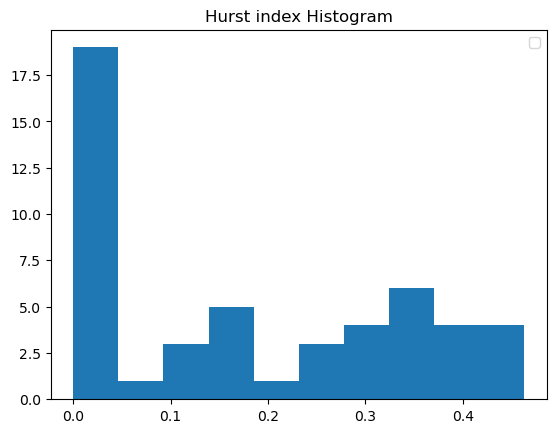

In [8]:
Number_indices = 50
dimension = 3
#H = 0.15
#Hs = [H for i in range(dimension)]
Hs = [0.001236,0.064988 ,0.023365 ]
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]


Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
weights = np.array([0.2,0.7,0.1])

for i in range(Number_indices):
    # weights = np.random.randint(1, 10, dimension)
    # weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    #Multiple_Sfbms.append([Sfbm(Hs[i],0.02 ,2**14) for i in range(dimension)])
    Multiple_Sfbms.append([])

Multiple_Hs=[Hs for i in range(Number_indices)]
Multiple_lambdasquare_list=[lambdasquare_list for i in range(Number_indices)]
Multiple_T_list=[T_list for i in range(Number_indices)]
Multiple_sigma_list=[sigma_list for i in range(Number_indices)]
correlations = {(0,1):-0.06368572,(0,2):0.9,(1,2):-0.13849021}
Multiple_correlations = [correlations for i in range(Number_indices)]

MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)

trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000)

keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'quadratic variation estimate',keys)

Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram',"",10)

=> Estimator H for index is not accurate but reveals the evidence observed in the empirical data

=> Dependance on H of stocks, weights and correlation => construction of the index

### - Random eigen values correl matrix approach: exp(w) w indep with fixed eigen vectors

- d=3

trajectories =  [(array([-1.29663976e-10, -1.28308257e-10, -1.45104829e-10, ...,
       -1.28634151e-06, -1.28628532e-06, -1.28643636e-06]), array([], dtype=float64)), (array([-3.71786061e-05, -8.38157956e-05, -1.07803639e-05, ...,
       -4.74421071e-02, -4.74373228e-02, -4.74159196e-02]), array([], dtype=float64)), (array([-3.47736642e-05, -3.58805603e-05, -5.29728971e-05, ...,
        1.54896918e-02,  1.54996105e-02,  1.56975427e-02]), array([], dtype=float64))]
*******************************
res =        fun: 0.0036853991630832585
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.24945931e-06, -3.46944697e-10, -1.08420218e-09])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 432
      nit: 46
     njev: 108
   status: 0
  success: True
        x: array([-1.96599983, -2.40722273,  1.04927919])
*******************************
Objective function value after calibration =  0.0023249530061584577


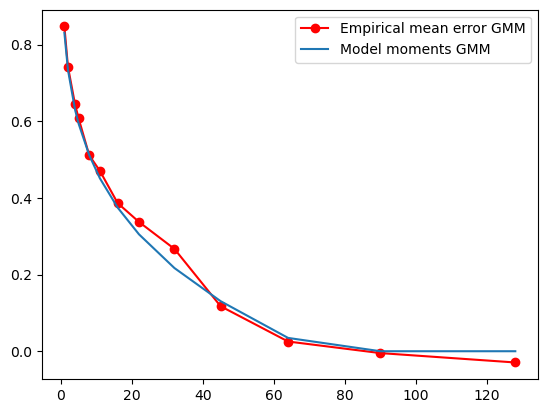

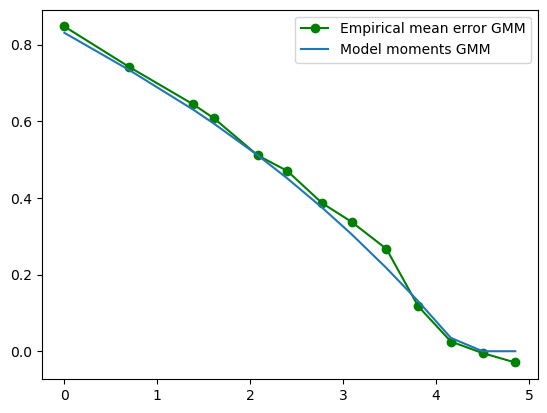

H =  0.10393036680581937 lambda2 = 0.09418373265288 T =  2.434431589680336 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5041229104569729 J =  9.297487071627673 J_95 =  18.30703805327515
------------------------------------------------------
index_estimatedGMM_paramSfbms =  (0.10393036680581937, 0.09418373265288, 2.434431589680336, 4.5399929762484854e-05, 0.5041229104569729, 9.297487071627673, 18.30703805327515, [array([ 0.84711199,  0.74216054,  0.64393735,  0.6076386 ,  0.51099732,
        0.47038248,  0.38641632,  0.33728359,  0.26681766,  0.11738899,
        0.02533944, -0.00486576, -0.02934661]), array([0.83056379, 0.73422885, 0.63013638, 0.59369122, 0.51141312,
       0.45102041, 0.37470099, 0.3050205 , 0.21691889, 0.13057888,
       0.03471827, 0.        , 0.        ]), array([  1,   2,   4,   5,   8,  11,  16,  22,  32,  45,  64,  90, 128])])


In [2]:
dimension = 3
#H = 0.05
#Hs = [H for i in range(dimension)]
Hs = [0.001236,0.064988 ,0.023365 ]
# weights = np.random.randint(1, 10, dimension)
# weights = weights / np.sum(weights)
weights = np.array([0.2,0.7,0.1])
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]

Sfbms = []#[Sfbm(Hs[i],0.068970 ,2**14) for i in range(dimension)] #

#correlations = {(0,1):0,(0,2):0,(0,3):0,(0,4):0,(1,2):0,(1,3):0,(1,4):0,(2,3):0,(2,4):0,(3,4):0}
#correlations = {(0,1):0,(0,2):0,(1,2):0}
correlations = {(0,1):-0.06368572,(0,2):0.9,(1,2):-0.13849021}  # => H ~ 0.33
#correlations = {(0,1):0.2,(0,2):0.85,(1,2):0.01}

MultidimensionalSfbms_generalmodel = MultidimensionalSfbm(Sfbms, correlations,dimension,Hs,lambdasquare_list,T_list,sigma_list )
log_vol_index_generation_generalmodel_Sfbms = MultidimensionalSfbms_generalmodel.GeneratelogVolMultidimSfbm_Index(weights,'quadratic variation estimate',4000,'mrw',8,32,'Brownian correlates - random correl matrix')

GMM_index = GMM()
index_estimatedGMM_paramSfbms = GMM_index.ComputeParamsGMM(log_vol_index_generation_generalmodel_Sfbms,10)
print("index_estimatedGMM_paramSfbms = ", index_estimatedGMM_paramSfbms)

Check the robustness

*******************************
res =        fun: 0.0018548230935799648
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.22827704e-06, -2.05347893e-08,  1.63098484e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 420
      nit: 29
     njev: 105
   status: 0
  success: True
        x: array([-6.83677136, -2.56092514,  0.00874044])
*******************************
Objective function value after calibration =  0.0029741589154586292
H =  0.0010724944023520306 lambda2 = 0.06945744460874172 T =  1.0087253585078095 lsigma2 = 4.5399929762484854e-05 p-Value=  0.2922364046098967 J =  11.893661502919034 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.001715731682319223
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.29393632e-06, -1.64234946e-07,  3.05467457e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
    

Objective function value after calibration =  0.005180313918543877
H =  0.0010978352035073892 lambda2 = 0.17368442593306793 T =  1.0086691965055925 lsigma2 = 4.5399929762484854e-05 p-Value=  0.023162732290219694 J =  20.71607536025696 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.005650804643372207
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.19677272e-04, -5.82693619e-07,  1.32932988e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 324
      nit: 35
     njev: 81
   status: 0
  success: True
        x: array([-6.86813582, -1.86492401,  0.00940887])
*******************************
Objective function value after calibration =  0.004119469220305283
H =  0.0010388298267556028 lambda2 = 0.1214658398691111 T =  1.0096784613440333 lsigma2 = 4.5399929762484854e-05 p-Value=  0.08685003684993939 J =  16.473757412000793 J_95 =  18.30703805327515
----

*******************************
res =        fun: 0.005248548905141293
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00580039, 0.00362209, 0.02713354])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 464
      nit: 35
     njev: 116
   status: 2
  success: False
        x: array([-1.86340929, -3.20773554,  1.11712328])
*******************************
Objective function value after calibration =  0.0041660370601581675
H =  0.13644422701469902 lambda2 = 0.03726937386947807 T =  3.1108846471337257 lsigma2 = 4.5399929762484854e-05 p-Value=  0.082234514609264 J =  16.65998220354516 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.013654884730646983
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.99397531e-05, -6.27102540e-07, -6.45421216e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 328
      nit: 35
     njev: 

Objective function value after calibration =  0.004811323003415503
H =  0.0008843225198519877 lambda2 = 0.15820384023677536 T =  1.008246201226205 lsigma2 = 4.5399929762484854e-05 p-Value=  0.03731241087083528 J =  19.240480690658597 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.002765740720437443
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.38031906e-06,  2.54570672e-08,  1.65929336e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 344
      nit: 34
     njev: 86
   status: 0
  success: True
        x: array([-6.72522806, -1.53326625,  0.00984039])
*******************************
Objective function value after calibration =  0.0012922202000522388
H =  0.0011981649357595983 lambda2 = 0.16796797571129396 T =  1.010015833159919 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8797053006663659 J =  5.167588580008903 J_95 =  18.30703805327515
------

*******************************
res =        fun: 0.027313729482715016
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.92896786e-04, -8.41687836e-07,  2.21593577e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 832
      nit: 69
     njev: 208
   status: 0
  success: True
        x: array([-6.52350107, -1.33487879,  0.01259643])
*******************************
Objective function value after calibration =  0.013193339857133553
H =  0.0014663724473209841 lambda2 = 0.20835145989236672 T =  1.0122715686644768 lsigma2 = 4.5399929762484854e-05 p-Value=  8.249737784935591e-08 J =  52.76016608867708 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.015737687031287938
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.73160098e-06, 8.11850592e-08, 2.01227924e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 504
      nit

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.001909795690463833
H =  0.0011986182843950828 lambda2 = 0.13071002190880335 T =  1.010019640719071 lsigma2 = 4.5399929762484854e-05 p-Value=  0.664219717807965 J =  7.637272966164868 J_95 =  18.30703805327515
------------------------------------------------------


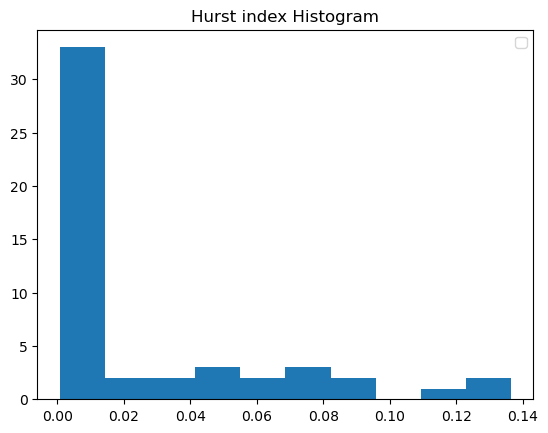

In [3]:
Number_indices = 50
dimension = 3
#H = 0.15
#Hs = [H for i in range(dimension)]
Hs = [0.001236,0.064988 ,0.023365 ]
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]


Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
weights = np.array([0.2,0.7,0.1])

for i in range(Number_indices):
    # weights = np.random.randint(1, 10, dimension)
    # weights = weights / np.sum(weights)
    Multiple_weights.append(weights)
    #Multiple_Sfbms.append([Sfbm(Hs[i],0.02 ,2**14) for i in range(dimension)])
    Multiple_Sfbms.append([])

Multiple_Hs=[Hs for i in range(Number_indices)]
Multiple_lambdasquare_list=[lambdasquare_list for i in range(Number_indices)]
Multiple_T_list=[T_list for i in range(Number_indices)]
Multiple_sigma_list=[sigma_list for i in range(Number_indices)]
correlations = {(0,1):-0.06368572,(0,2):0.9,(1,2):-0.13849021}
Multiple_correlations = [correlations for i in range(Number_indices)]

MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)

trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000,8,'mrw','Brownian correlates - random correl matrix')

keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'quadratic variation estimate',keys,32,'Brownian correlates - random correl matrix')

Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram',"",10)

### => The classical approach is better

#### Testing the robustness with stocks of null hurst 

*******************************
res =        fun: 0.002055206554337449
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.00430697e-03, -4.69832509e-06,  4.18453466e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 836
      nit: 49
     njev: 209
   status: 0
  success: True
        x: array([-7.13329334, -2.36375055,  0.00874938])
*******************************
Objective function value after calibration =  0.0025545618138741104
H =  0.0007942491238001919 lambda2 = 0.08275271140810876 T =  1.0088342486912174 lsigma2 = 4.5399929762484854e-05 p-Value=  0.4217781061187989 J =  10.215692693682568 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.001108483141315781
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.85278877e-05, -1.24032729e-07, -1.49862761e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 792
      n

Objective function value after calibration =  0.0049270683610355675
H =  0.0011017500956383769 lambda2 = 0.07921132727883559 T =  1.0127928162700703 lsigma2 = 4.5399929762484854e-05 p-Value=  0.03218673168421423 J =  19.703346375781233 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.005119898020061985
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.81968764e-06, -5.99000020e-07, -2.96351485e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 568
      nit: 49
     njev: 142
   status: 0
  success: True
        x: array([-3.32246935, -2.40678705,  0.35435586])
*******************************
Objective function value after calibration =  0.003904366692811329
H =  0.048381829643880166 lambda2 = 0.070306267830835 T =  1.6369338079773033 lsigma2 = 4.5399929762484854e-05 p-Value=  0.11124192635919494 J =  15.613562404354557 J_95 =  18.30703805327515
----

*******************************
res =        fun: 0.0012370267192944745
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.92918774e-05,  2.07388361e-06,  1.42457660e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 324
      nit: 35
     njev: 81
   status: 0
  success: True
        x: array([-6.23391418, -2.27121016,  0.01788264])
*******************************
Objective function value after calibration =  0.0023550007778974044
H =  0.0019564812646658734 lambda2 = 0.08470454162048087 T =  1.0180956701133645 lsigma2 = 4.5399929762484854e-05 p-Value=  0.49297807139294714 J =  9.41764811081172 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.00292902266220124
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.60893912e-04, -5.11968943e-06,  7.27374758e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 756
      nit

Objective function value after calibration =  0.0011144004185766807
H =  0.0018281389909279885 lambda2 = 0.07452118293211467 T =  1.0231511756697806 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9244138784698447 J =  4.456487273888146 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.001893715491346707
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.96032775e-04, 1.06845956e-06, 1.47953047e-04])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 668
      nit: 44
     njev: 167
   status: 2
  success: False
        x: array([-6.71979647, -2.53589414,  0.01380819])
*******************************
Objective function value after calibration =  0.003500406337556822
H =  0.001203182241784292 lambda2 = 0.07115313552788716 T =  1.0140899028741097 lsigma2 = 4.5399929762484854e-05 p-Value=  0.17307715217967326 J =  13.998124943889731 J_95 =  18.30703805327515
-----------------------

*******************************
res =        fun: 0.0014726080436563305
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.26118301e-05,  5.78118286e-07,  3.67602173e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 352
      nit: 38
     njev: 88
   status: 0
  success: True
        x: array([-7.02874451, -2.46691575,  0.00951071])
*******************************
Objective function value after calibration =  0.0022192068753335457
H =  0.0008837429137914527 lambda2 = 0.07749810340454212 T =  1.0095968714503727 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5440437141333684 J =  8.874608294458849 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0019264421145471944
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.61062137e-04, -2.78639960e-08,  2.58439103e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 508
      n

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.002318361286053551
H =  0.0008700881237433825 lambda2 = 0.08221916813006057 T =  1.0100472794484605 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5065805871025246 J =  9.271126782928151 J_95 =  18.30703805327515
------------------------------------------------------


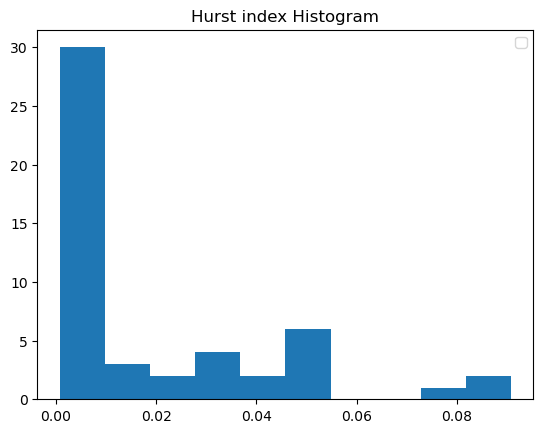

In [6]:
Number_indices = 50
dimension = 3
Hs = [0,0,0]  # H_index null for all
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]


Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
weights = np.array([0.2,0.7,0.1])

for i in range(Number_indices):
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([])

Multiple_Hs=[Hs for i in range(Number_indices)]
Multiple_lambdasquare_list=[lambdasquare_list for i in range(Number_indices)]
Multiple_T_list=[T_list for i in range(Number_indices)]
Multiple_sigma_list=[sigma_list for i in range(Number_indices)]

correlations = {(0,1):-0.06368572,(0,2):0.9,(1,2):-0.13849021}

Multiple_correlations = [correlations for i in range(Number_indices)]
MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000,8,'mrw','Brownian correlates - random correl matrix')
keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'quadratic variation estimate',keys,32,'Brownian correlates - random correl matrix')

Index_trajectories_synthesis = log_vol_indices_dic[1]
GMM_index_trajectories_obj = GMM()
GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram',"",10)

Same weights

*******************************
res =        fun: 0.0031324596459996333
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.10564770e-04, 8.97155619e-07, 8.96634329e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 688
      nit: 44
     njev: 172
   status: 0
  success: True
        x: array([-7.04557034, -2.48569911,  0.01066924])
*******************************
Objective function value after calibration =  0.0033462097305111543
H =  0.0008696113458733783 lambda2 = 0.07941237904915109 T =  1.0106645437958244 lsigma2 = 4.5399929762484854e-05 p-Value=  0.20311718472336138 J =  13.381492712314106 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0020454916679368412
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.55487213e-04, 2.49453237e-07, 2.06259966e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfe

Objective function value after calibration =  0.0009585367836283671
H =  0.03679995974802039 lambda2 = 0.07168648226845979 T =  1.4661099640285455 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9545585016963055 J =  3.83318859772984 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.00029671073479502446
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 7.70650909e-08, -4.11996828e-10, -1.75277544e-07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 696
      nit: 90
     njev: 174
   status: 0
  success: True
        x: array([-3.65274993, -2.53817365,  0.26865007])
*******************************
Objective function value after calibration =  0.0006640925061436124
H =  0.023093378304280498 lambda2 = 0.07310829838555631 T =  1.2808564860221583 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9884072731595281 J =  2.655705932068306 J_95 =  18.30703805327515
------

*******************************
res =        fun: 0.0031179609051928308
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.09943132e-04, -5.95920886e-06, -8.55299338e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 328
      nit: 35
     njev: 82
   status: 0
  success: True
        x: array([-6.65420767, -2.22860888,  0.01479372])
*******************************
Objective function value after calibration =  0.002475378226324707
H =  0.0012882100691382944 lambda2 = 0.08926720067065412 T =  1.0153724414355207 lsigma2 = 4.5399929762484854e-05 p-Value=  0.44939535089007276 J =  9.89903753363896 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0008397585292135464
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.77629484e-06,  1.70219742e-09, -1.81712284e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     n

Objective function value after calibration =  0.004211764618448124
H =  0.0020845395077893447 lambda2 = 0.0717442864804869 T =  1.022484410214404 lsigma2 = 4.5399929762484854e-05 p-Value=  0.0779145184453414 J =  16.842846709174047 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0021265358465087335
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.85793222e-06,  2.65022381e-07,  1.35412514e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 596
      nit: 58
     njev: 149
   status: 2
  success: False
        x: array([-2.30460036, -2.94660295,  0.88079992])
*******************************
Objective function value after calibration =  0.002316130907271734
H =  0.05915405824693421 lambda2 = 0.06541457683843693 T =  1.7773251254588855 lsigma2 = 4.5399929762484854e-05 p-Value=  0.507413178270996 J =  9.262207498179663 J_95 =  18.30703805327515
-------------------------

*******************************
res =        fun: 0.0014746976898850038
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.06880045e-05,  7.42244812e-08, -6.62547274e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 608
      nit: 48
     njev: 152
   status: 2
  success: False
        x: array([-6.54991038, -2.39065869,  0.01334681])
*******************************
Objective function value after calibration =  0.002735156585159135
H =  0.0014270928286603864 lambda2 = 0.07831430098083861 T =  1.0135897006378736 lsigma2 = 4.5399929762484854e-05 p-Value=  0.3623773083958368 J =  10.93789118405138 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.00043452134043103546
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.70207816e-06, 1.19191767e-07, 5.16660283e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 388
      nit: 43
     njev: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.0033846526484177454
H =  0.0008787948683037054 lambda2 = 0.08629009366616198 T =  1.0109355941454903 lsigma2 = 4.5399929762484854e-05 p-Value=  0.19526595875202757 J =  13.53522591418466 J_95 =  18.30703805327515
------------------------------------------------------


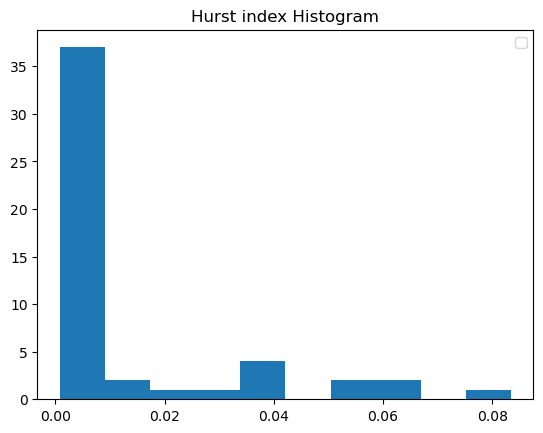

In [7]:
Number_indices = 50
dimension = 3
Hs = [0,0,0]  # H_index null for all
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]


Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
weights = np.array([0.3,0.3,0.4])

for i in range(Number_indices):
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([])

Multiple_Hs=[Hs for i in range(Number_indices)]
Multiple_lambdasquare_list=[lambdasquare_list for i in range(Number_indices)]
Multiple_T_list=[T_list for i in range(Number_indices)]
Multiple_sigma_list=[sigma_list for i in range(Number_indices)]

correlations = {(0,1):-0.06368572,(0,2):0.9,(1,2):-0.13849021}

Multiple_correlations = [correlations for i in range(Number_indices)]
MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)
trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000,8,'mrw','Brownian correlates - random correl matrix')
keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'quadratic variation estimate',keys,32,'Brownian correlates - random correl matrix')

Index_trajectories_synthesis = log_vol_indices_dic[1]
GMM_index_trajectories_obj = GMM()
GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram',"",10)

Increase the number of stocks

*******************************
res =        fun: 0.0010065637275329328
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.01346840e-04, 1.08084115e-06, 1.26582989e-04])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 744
      nit: 40
     njev: 186
   status: 2
  success: False
        x: array([-6.78564832, -2.4185868 ,  0.01310529])
*******************************
Objective function value after calibration =  0.0009537773481818247
H =  0.0011286975190934422 lambda2 = 0.08203078284319312 T =  1.013221230672496 lsigma2 = 4.5399929762484854e-05 p-Value=  0.955341513862146 J =  3.814155615379102 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0015937268860378617
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.21641023e-04, -3.74223224e-07,  2.80723795e-06])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 476
      nit: 38
     njev: 11

Objective function value after calibration =  0.0010775326415533761
H =  0.023236326694597395 lambda2 = 0.0720392487053812 T =  1.339688819980666 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9323299653007987 J =  4.309053033571951 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0007350447193426588
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.43086738e-05, 2.96334140e-07, 1.57719215e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 636
      nit: 48
     njev: 159
   status: 0
  success: True
        x: array([-5.78054771, -2.2202455 ,  0.04968041])
*******************************
Objective function value after calibration =  0.0007434465465632329
H =  0.003103135109483266 lambda2 = 0.09474848372403509 T =  1.05196791780937 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9820513497537967 J =  2.9730427366881935 J_95 =  18.30703805327515
-----------

*******************************
res =        fun: 0.000964767426972148
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.09777726e-04, 6.90094687e-08, 4.89953564e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1624
      nit: 78
     njev: 406
   status: 0
  success: True
        x: array([-5.67630006, -2.63302521,  0.04349744])
*******************************
Objective function value after calibration =  0.0016749792355231056
H =  0.0022711430296780497 lambda2 = 0.07141026066160065 T =  1.0286263011908563 lsigma2 = 4.5399929762484854e-05 p-Value=  0.7535924898868567 J =  6.698241962856899 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0012592765495081767
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.00752654e-05, -1.45998665e-07,  4.68133128e-05])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 396
      nit

Objective function value after calibration =  0.0014959738387766122
H =  0.003076626369268633 lambda2 = 0.0846111419518792 T =  1.0304509898821157 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8167397972027609 J =  5.982399381267677 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.00025535862003430484
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.17507351e-08, 3.93782231e-08, 1.01015116e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 760
      nit: 76
     njev: 190
   status: 2
  success: False
        x: array([-2.49059864, -2.70839836,  0.73196646])
*******************************
Objective function value after calibration =  0.000498521751716863
H =  0.07641796089892651 lambda2 = 0.0626397493418388 T =  2.074056517232082 lsigma2 = 4.5399929762484854e-05 p-Value=  0.9963890561467434 J =  1.9935884851157353 J_95 =  18.30703805327515
---------------------------

*******************************
res =        fun: 0.0011880207890946379
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.76433132e-06, -1.11455984e-08,  5.12177104e-08])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 368
      nit: 36
     njev: 92
   status: 2
  success: False
        x: array([-2.58910136, -2.8284424 ,  0.80301941])
*******************************
Objective function value after calibration =  0.0023315219830037674
H =  0.04729698667709721 lambda2 = 0.06494270878763748 T =  1.7548117800242125 lsigma2 = 4.5399929762484854e-05 p-Value=  0.5016782063046576 J =  9.323756410006988 J_95 =  18.30703805327515
------------------------------------------------------
*******************************
res =        fun: 0.0035263796703237297
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([9.46573554e-06, 2.52315531e-07, 5.30348332e-07])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 428
      nit: 37
     njev: 107

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Objective function value after calibration =  0.0014248058806738723
H =  0.005851324540238795 lambda2 = 0.08222382885895044 T =  1.0667689622427856 lsigma2 = 4.5399929762484854e-05 p-Value=  0.8399817383879404 J =  5.697798714292903 J_95 =  18.30703805327515
------------------------------------------------------


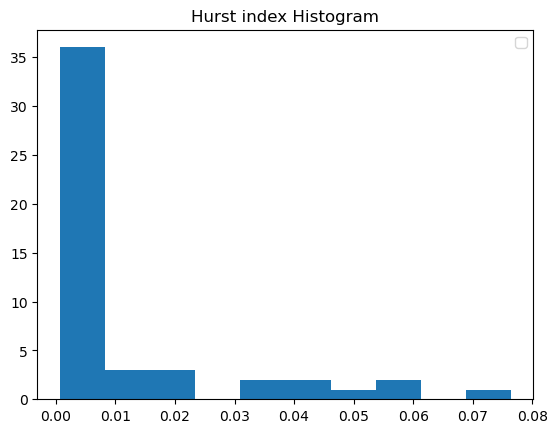

In [10]:
Number_indices = 50
dimension = 5
Hs = [0,0,0,0,0]  # H_index non null
lambdasquare_list,T_list,sigma_list = [0.02 for i in range(dimension)],[2**14 for i in range(dimension)],[1 for i in range(dimension)]


Multiple_weights,Multiple_Sfbms = [],[]
Multiple_indices = dict()
weights = np.array([0.2,0.45,0.1,0.15,0.1])

for i in range(Number_indices):
    Multiple_weights.append(weights)
    Multiple_Sfbms.append([])

Multiple_Hs=[Hs for i in range(Number_indices)]
Multiple_lambdasquare_list=[lambdasquare_list for i in range(Number_indices)]
Multiple_T_list=[T_list for i in range(Number_indices)]
Multiple_sigma_list=[sigma_list for i in range(Number_indices)]
correlations = {(0,1):-0.06,(0,2):0.9,(0,3):0.4,(0,4):0.02,(1,2):-0.7,(1,3):0.41,(1,4):-0.91,(2,3):-0.1,(2,4):-0.1,(3,4):0.95}
Multiple_correlations = [correlations for i in range(Number_indices)]

MultipleIndicesConstructor_obj = MultipleIndicesConstructor(Multiple_weights,Multiple_Sfbms,Multiple_correlations,Multiple_Hs,Multiple_lambdasquare_list,Multiple_T_list,Multiple_sigma_list)

trajectories_indices = MultipleIndicesConstructor_obj.ConstructIndicestrajectories(4000,8,'mrw','Brownian correlates - random correl matrix')

keys = ['Index trajectory' for i in range(Number_indices)]
log_vol_indices_dic = MultipleIndicesConstructor_obj.ConstructLogVolIndicestrajectories(4000,8,'quadratic variation estimate',keys,32,'Brownian correlates - random correl matrix')

Index_trajectories_synthesis = log_vol_indices_dic[1]

GMM_index_trajectories_obj = GMM()
GMM_index_trajectories_obj.HurstIndexEvolution_GMMCalibration(Index_trajectories_synthesis,'histogram',"",10)